In [1]:
# !pip install tensorflow

#### **Import Libraries**

In [2]:
# Import librabries
import pandas as pd #interacting with dataframe
import numpy as np #for arrays
import seaborn as sns #For viz
import matplotlib.pyplot as plt  #viz

import yfinance as yf
import plotly.express as px

# from tensorflow.keras.layers import LSTM

**Netflix stock data**

In [3]:
start = "2004-06-07"
end = "2024-06-07"

# Specify stock symbol and date range
stock_symbol = 'NFLX'
# Fetch historical stock data
netflix = yf.download(stock_symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


**Tesla stock data**

In [4]:
start = "2004-06-07"
end = "2024-06-07"

# Specify stock symbol and date range
stock_symbol = 'TSLA'
# Fetch historical stock data
tesla = yf.download(stock_symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
netflix.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-31  644.010010  648.580017  628.299988  641.619995  641.619995   
2024-06-03  645.219971  646.780029  627.270020  633.789978  633.789978   
2024-06-04  633.780029  635.229980  626.440002  631.619995  631.619995   
2024-06-05  634.020020  651.250000  628.250000  650.270020  650.270020   
2024-06-06  644.890015  657.989990  644.239990  648.520020  648.520020   

             Volume  
Date                 
2024-05-31  4071000  
2024-06-03  2323500  
2024-06-04  3008200  
2024-06-05  2682600  
2024-06-06  2466700

In [6]:
tesla.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-31  178.500000  180.320007  173.820007  178.080002  178.080002   
2024-06-03  178.130005  182.639999  174.490005  176.289993  176.289993   
2024-06-04  174.779999  177.759995  174.000000  174.770004  174.770004   
2024-06-05  175.350006  176.149994  172.130005  175.000000  175.000000   
2024-06-06  174.600006  179.729996  172.729996  177.940002  177.940002   

              Volume  
Date                  
2024-05-31  67314600  
2024-06-03  68568900  
2024-06-04  60056300  
2024-06-05  57953800  
2024-06-06  69887000

In [7]:
print(f'Netflix data shape {netflix.shape}') # Return number of rows and columns
print(f'Tesla data shape {tesla.shape}') # Return number of rows and columns

Netflix data shape (5035, 6)
Tesla data shape (3509, 6)


In [8]:
print(f'Netflix data columns {netflix.columns}') # Return list of columns
print(f'Tesla data shape {tesla.columns}')

Netflix data columns Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Tesla data shape Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


### Columns
1. Date
2. Open: Open stock price that day
3. High: The highest price that day/daily high price
4. Low: The lowest price that day
5. CLose: The closing price
6. Adj Close: The adjusted stock price after taking dividends, stock splits, and others into consideration
7. The volume of stocks traded that day

In [9]:
netflix.dtypes #Return datatypes of each column

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
tesla.dtypes #Return datatypes of each column

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

All float except Date

Statistical summary of Netflix stock data

In [11]:
netflix.describe() #Statistical summary

Open         High          Low        Close    Adj Close  \
count  5035.000000  5035.000000  5035.000000  5035.000000  5035.000000   
mean    155.421602   157.782045   153.000280   155.455044   155.455044   
std     186.637028   189.229865   183.928164   186.627759   186.627759   
min       1.300000     1.317143     1.272857     1.290000     1.290000   
25%       5.965714     6.134285     5.868572     5.986428     5.986428   
50%      54.654285    55.267143    53.925713    54.448570    54.448570   
75%     307.235001   312.699997   302.205002   307.705002   307.705002   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  5.035000e+03  
mean   1.570052e+07  
std    1.870599e+07  
min    1.144000e+06  
25%    5.840650e+06  
50%    9.718100e+06  
75%    1.846805e+07  
max    3.234140e+08

Statistical summary of tesla stock data

In [12]:
tesla.describe() #Statistical summary

Open         High          Low        Close    Adj Close  \
count  3509.000000  3509.000000  3509.000000  3509.000000  3509.000000   
mean     74.057537    75.667614    72.324719    74.033221    74.033221   
std     101.999565   104.245344    99.528061   101.916670   101.916670   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.346000    11.580000    11.037333    11.328667    11.328667   
50%      17.334000    17.563999    16.974667    17.330667    17.330667   
75%     147.783340   150.940002   143.566666   147.383331   147.383331   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.509000e+03  
mean   9.684396e+07  
std    7.894162e+07  
min    1.777500e+06  
25%    4.724100e+07  
50%    8.203590e+07  
75%    1.226560e+08  
max    9.140820e+08

### Exploratory Data Analysis

1. Univariate analysis
2. Multivariate analysis

In [13]:
# Missing values

print(netflix.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [14]:
# Missing values

print(tesla.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### Univariate Analysis

Trends using line charts

1. Closing price trend from listing-2024

In [15]:
# Line chart using plotly.express
netflix_close = px.line(netflix.reset_index(),
                      x='Date',
                      y='Close',
                      title='Netflix closing prices (listing - 2024)',
                      color_discrete_sequence=['blue'], # Color of line
                      width=1000, height=800)

netflix_close.show() #Show plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [16]:
netflix_close = px.line(netflix.reset_index(),
                      x='Date',
                      y='Close',
                      title='Netflix closing prices (2004-2024)',
                      color_discrete_sequence=['blue'],
                      width=1000, height=800)

netflix_close.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



2. Column "Open"

In [17]:
# Repeat same for open price
netflix_open = px.line(netflix.reset_index(),
                     x='Date',
                     y='Open',
                     title='Netflix Open prices (2004-2024)',
                     color_discrete_sequence=['green'],
                     width=1000, height=800)

netflix_open.show() # Show plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [18]:
# Repeat same for open price
tesla_open = px.line(tesla.reset_index(),
                     x='Date',
                     y='Open',
                     title='Tesla Open prices (2004-2024)',
                     color_discrete_sequence=['green'],
                     width=1000, height=800)

tesla_open.show() # Show plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [19]:
# fig = px.line(batsl,
#               x='Date',
#               y='Close',
#               title='British American Tobacco closing prices (2004-2024)',
#               color_discrete_sequence=['blue'],
#               width=1000, height=800)

# fig.add_scatter(x=batsl['Date'], y=batsl['Open'], mode='lines', name='British American Tobacco Open prices (2004-2024)')

# fig.show()

3. Adjusted close

In [20]:
netflix_close = px.line(netflix.reset_index(),
                      x='Date',
                      y='Adj Close',
                      title='Netflix adjusted closing prices (2004-2024)',
                      color_discrete_sequence=['blue'],
                      width=1000, height=800)

netflix_close.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [21]:
tesla_close = px.line(tesla.reset_index(),
                      x='Date',
                      y='Adj Close',
                      title='Tesla adjusted closing prices (2004-2024)',
                      color_discrete_sequence=['blue'],
                      width=1000, height=800)

tesla_close.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### 4. Adjusted close vs close
I did this to show how much the adjusted close price differs from the close price

<Axes: title={'center': 'Close price vs Adjusted close price for netflix'}, xlabel='Date'>

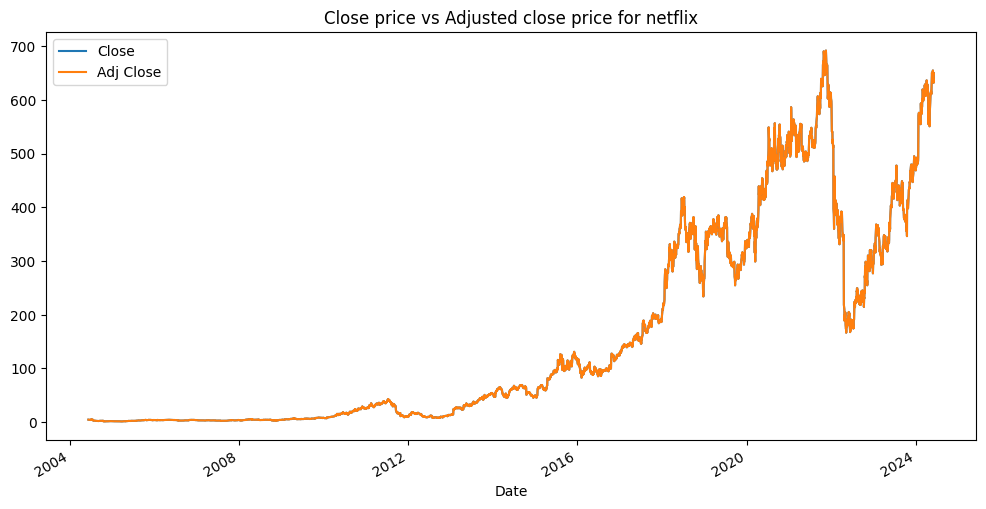

In [22]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
netflix.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for netflix')

<Axes: title={'center': 'Close price vs Adjusted close price for tesla'}, xlabel='Date'>

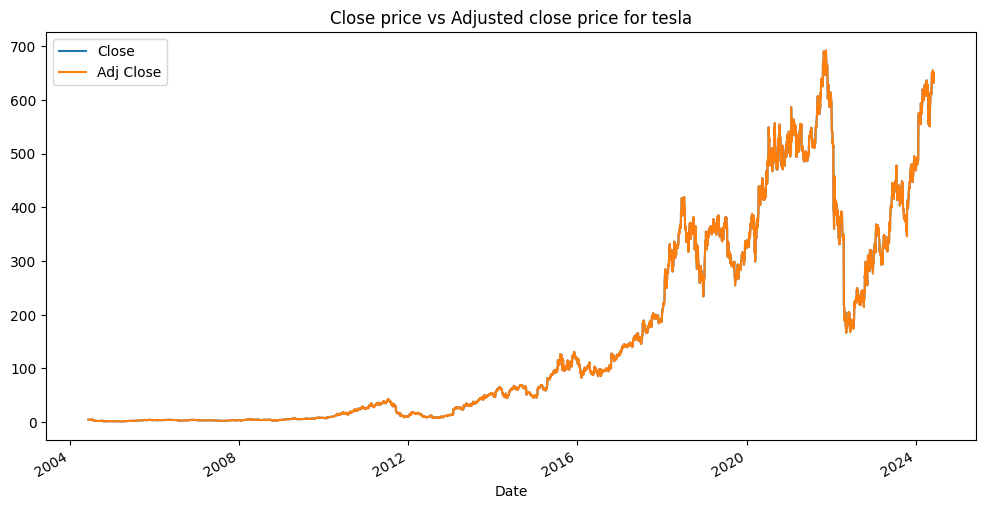

In [23]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
netflix.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for tesla')

5. Do the same for open and close prices

<Axes: title={'center': 'Open price vs Close price for netflix'}, xlabel='Date'>

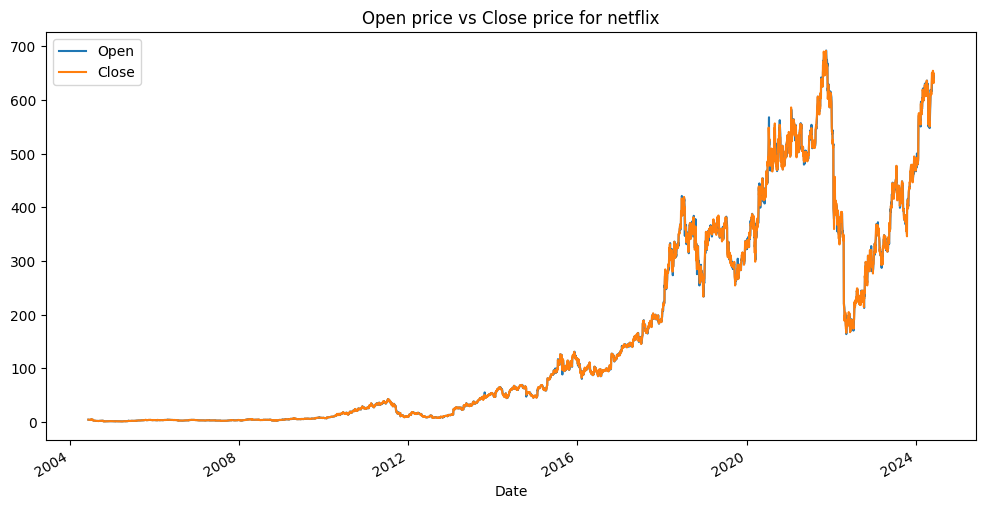

In [24]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

netflix.reset_index().plot(x='Date', y=['Open','Close'], ax=ax, title = 'Open price vs Close price for netflix')

<Axes: title={'center': 'Open price vs Close price for tesla'}, xlabel='Date'>

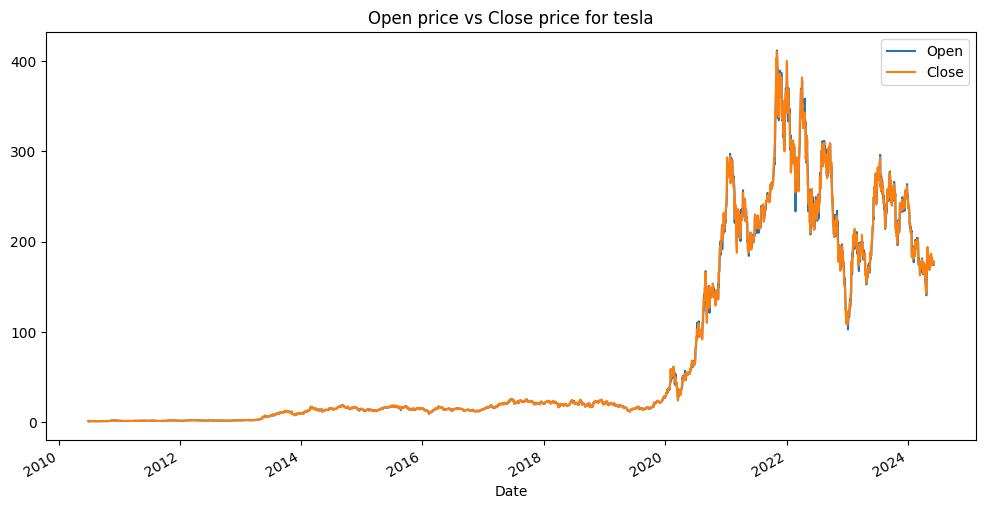

In [25]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

tesla.reset_index().plot(x='Date', y=['Open','Close'], ax=ax, title = 'Open price vs Close price for tesla')

6. Open price vs High

<Axes: title={'center': 'Open price vs High for netflix'}, xlabel='Date'>

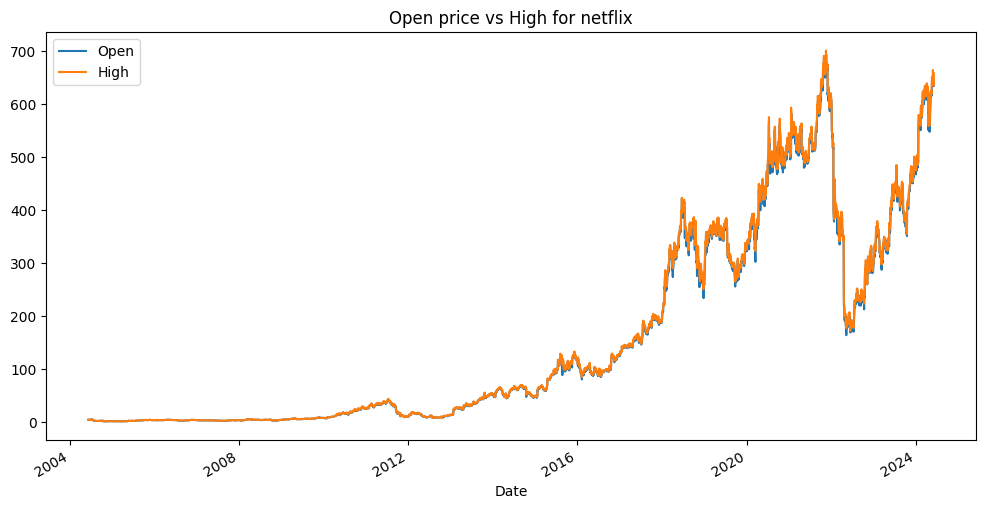

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

netflix.reset_index().plot(x='Date', y=['Open','High'], ax=ax, title = 'Open price vs High for netflix')

<Axes: title={'center': 'Open price vs High for tesla'}, xlabel='Date'>

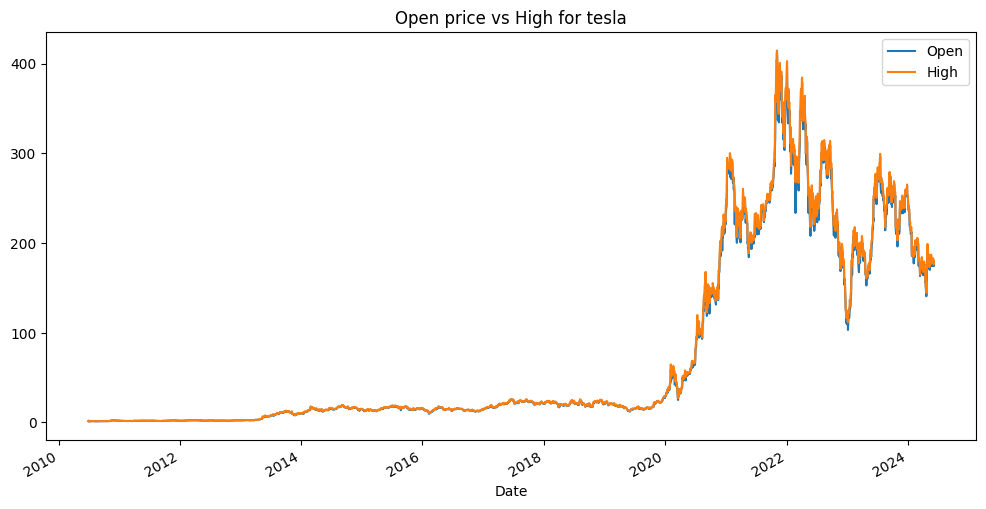

In [27]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

tesla.reset_index().plot(x='Date', y=['Open','High'], ax=ax, title = 'Open price vs High for tesla')

7. Open price vs Low

<Axes: title={'center': 'Open price vs Low for netflix'}, xlabel='Date'>

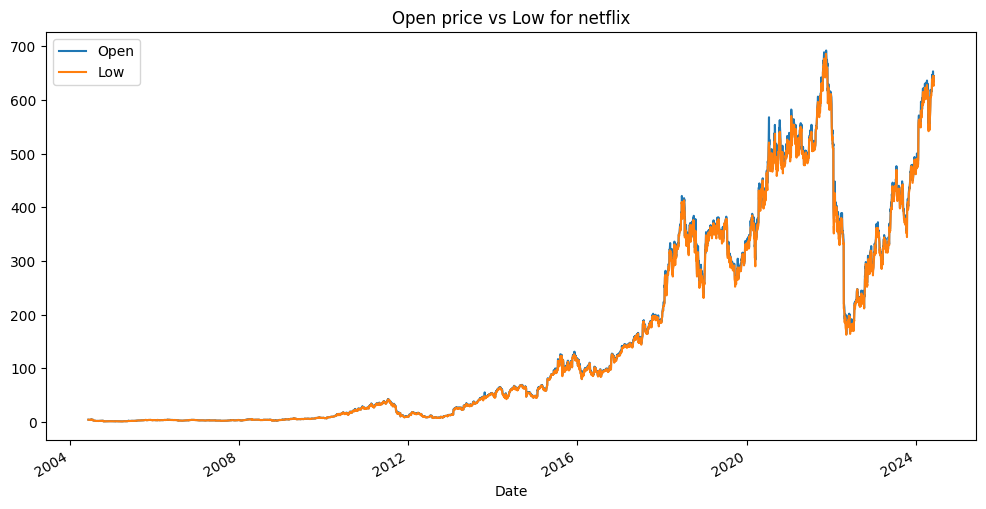

In [28]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

netflix.reset_index().plot(x='Date', y=['Open','Low'], ax=ax, title = 'Open price vs Low for netflix')

<Axes: title={'center': 'Open price vs Low for tesla'}, xlabel='Date'>

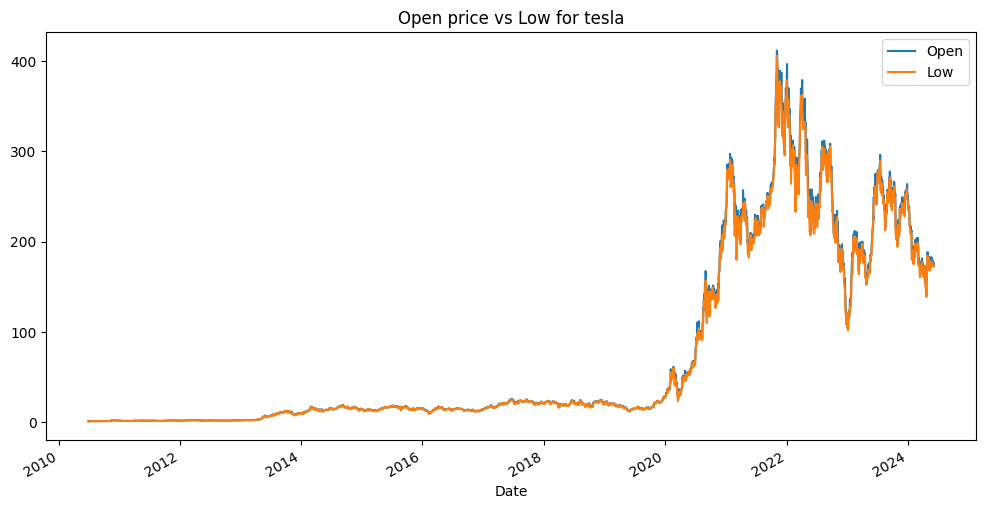

In [29]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

tesla.reset_index().plot(x='Date', y=['Open','Low'], ax=ax, title = 'Open price vs Low for tesla')

This plot is the same as above, but I used plotly to be able to interact with the plot and see the dates with absymal prices

In [30]:
fig = px.line(netflix.reset_index(),
              x='Date',
              y='Open',
              title='Netflix Open prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.add_scatter(x=netflix.reset_index()['Date'], y=netflix.reset_index()['Low'], mode='lines')

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [31]:
fig = px.line(tesla.reset_index(),
              x='Date',
              y='Open',
              title='Tesla Open prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.add_scatter(x=tesla.reset_index()['Date'], y=tesla.reset_index()['Low'], mode='lines')

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



8. Daily returns

In [32]:
# Calculate and create a new column on the daily returns which is the percentage change in the stock price from one day to the next
netflix['Daily returns'] = netflix['Close'].pct_change()*100

fig = px.line(netflix.reset_index(),
              x='Date',
              y='Daily returns',
              title='Netflix Daily returns (2004-2024)',
              color_discrete_sequence=['green'],
              labels={'Daily Return': 'Daily Return (%)', 'Date': 'Date'},
              hover_data={'Date': True, 'Daily returns': ':.2f'},
              width=1000, height=800)

fig.show() # Show the plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [33]:
# Calculate and create a new column on the daily returns which is the percentage in the stock price from one day to the next
tesla['Daily returns'] = tesla['Close'].pct_change()*100

fig = px.line(tesla.reset_index(),
              x='Date',
              y='Daily returns',
              title='Tesla Daily returns (2004-2024)',
              color_discrete_sequence=['green'],
              labels={'Daily Return': 'Daily Return (%)', 'Date': 'Date'},
              hover_data={'Date': True, 'Daily returns': ':.2f'},
              width=1000, height=800)

fig.show() # Show the plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



24.40% in May 2013 was the highest daily return in the 21 year period


In [34]:
netflix.head() # Display first five rows

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000   
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500   
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500   
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100   
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500   

            Daily returns  
Date                       
2004-06-07            NaN  
2004-06-08      -0.280370  
2004-06-09      -2.218045  
2004-06-10      -0.351446  
2004-06-14      -5.258088

In [35]:
tesla.head() # Display first five rows

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Daily returns  
Date                       
2010-06-29            NaN  
2010-06-30      -0.251148  
2010-07-01      -7.847274  
2010-07-02     -12.568307  
2010-07-06     -16.093748

9. Distribution of Open, High, Low, Close

Netflix

['High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']


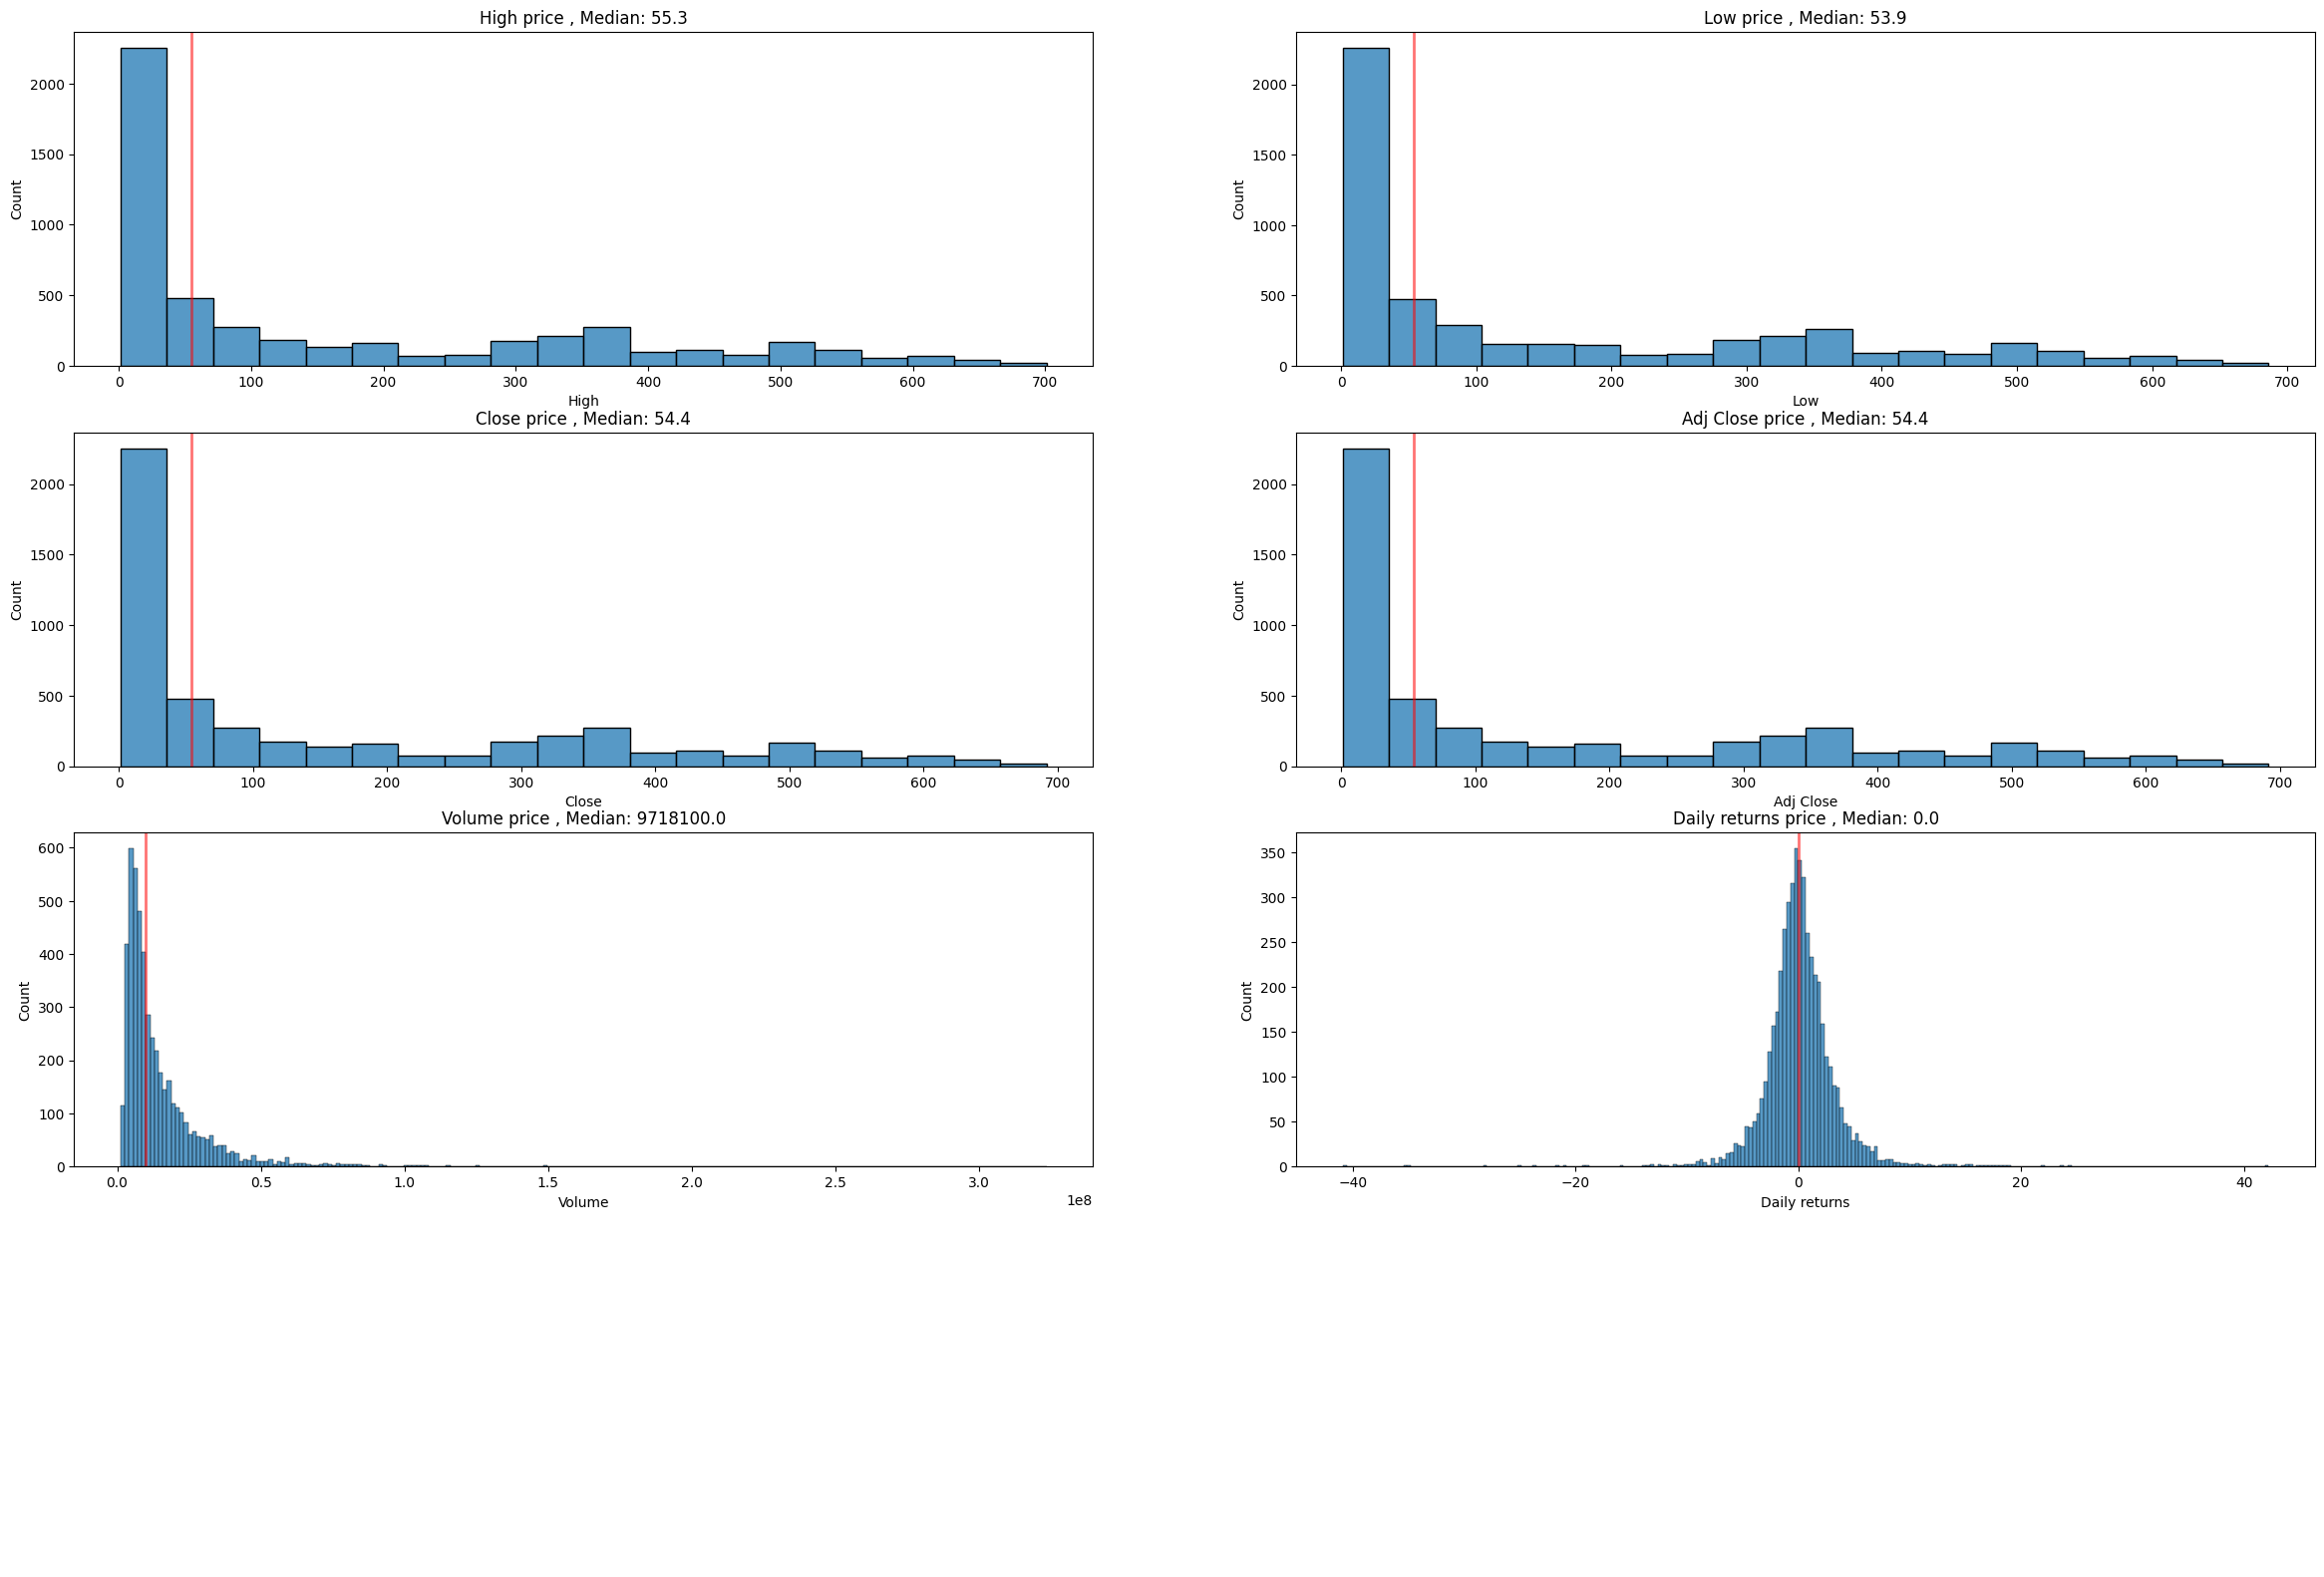

In [36]:
cols = netflix.columns.tolist()[1:] # all columns except date

fig, axes = plt.subplots(4,2, figsize=(29,20))

for i, ax in enumerate(axes.flatten()):
    if i < len(cols):
        sns.histplot(netflix[cols[i]], ax=ax)
        median = netflix[cols[i]].median()
        ax.set_title(f"{cols[i]} price , Median: {median:0.1f}")
        ax.axvline(median, color ='red', lw=2, alpha = 0.55)
    else:
        # Hide the subplot if there are no more columns to plot
        ax.axis('off')
print(cols)

['High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']


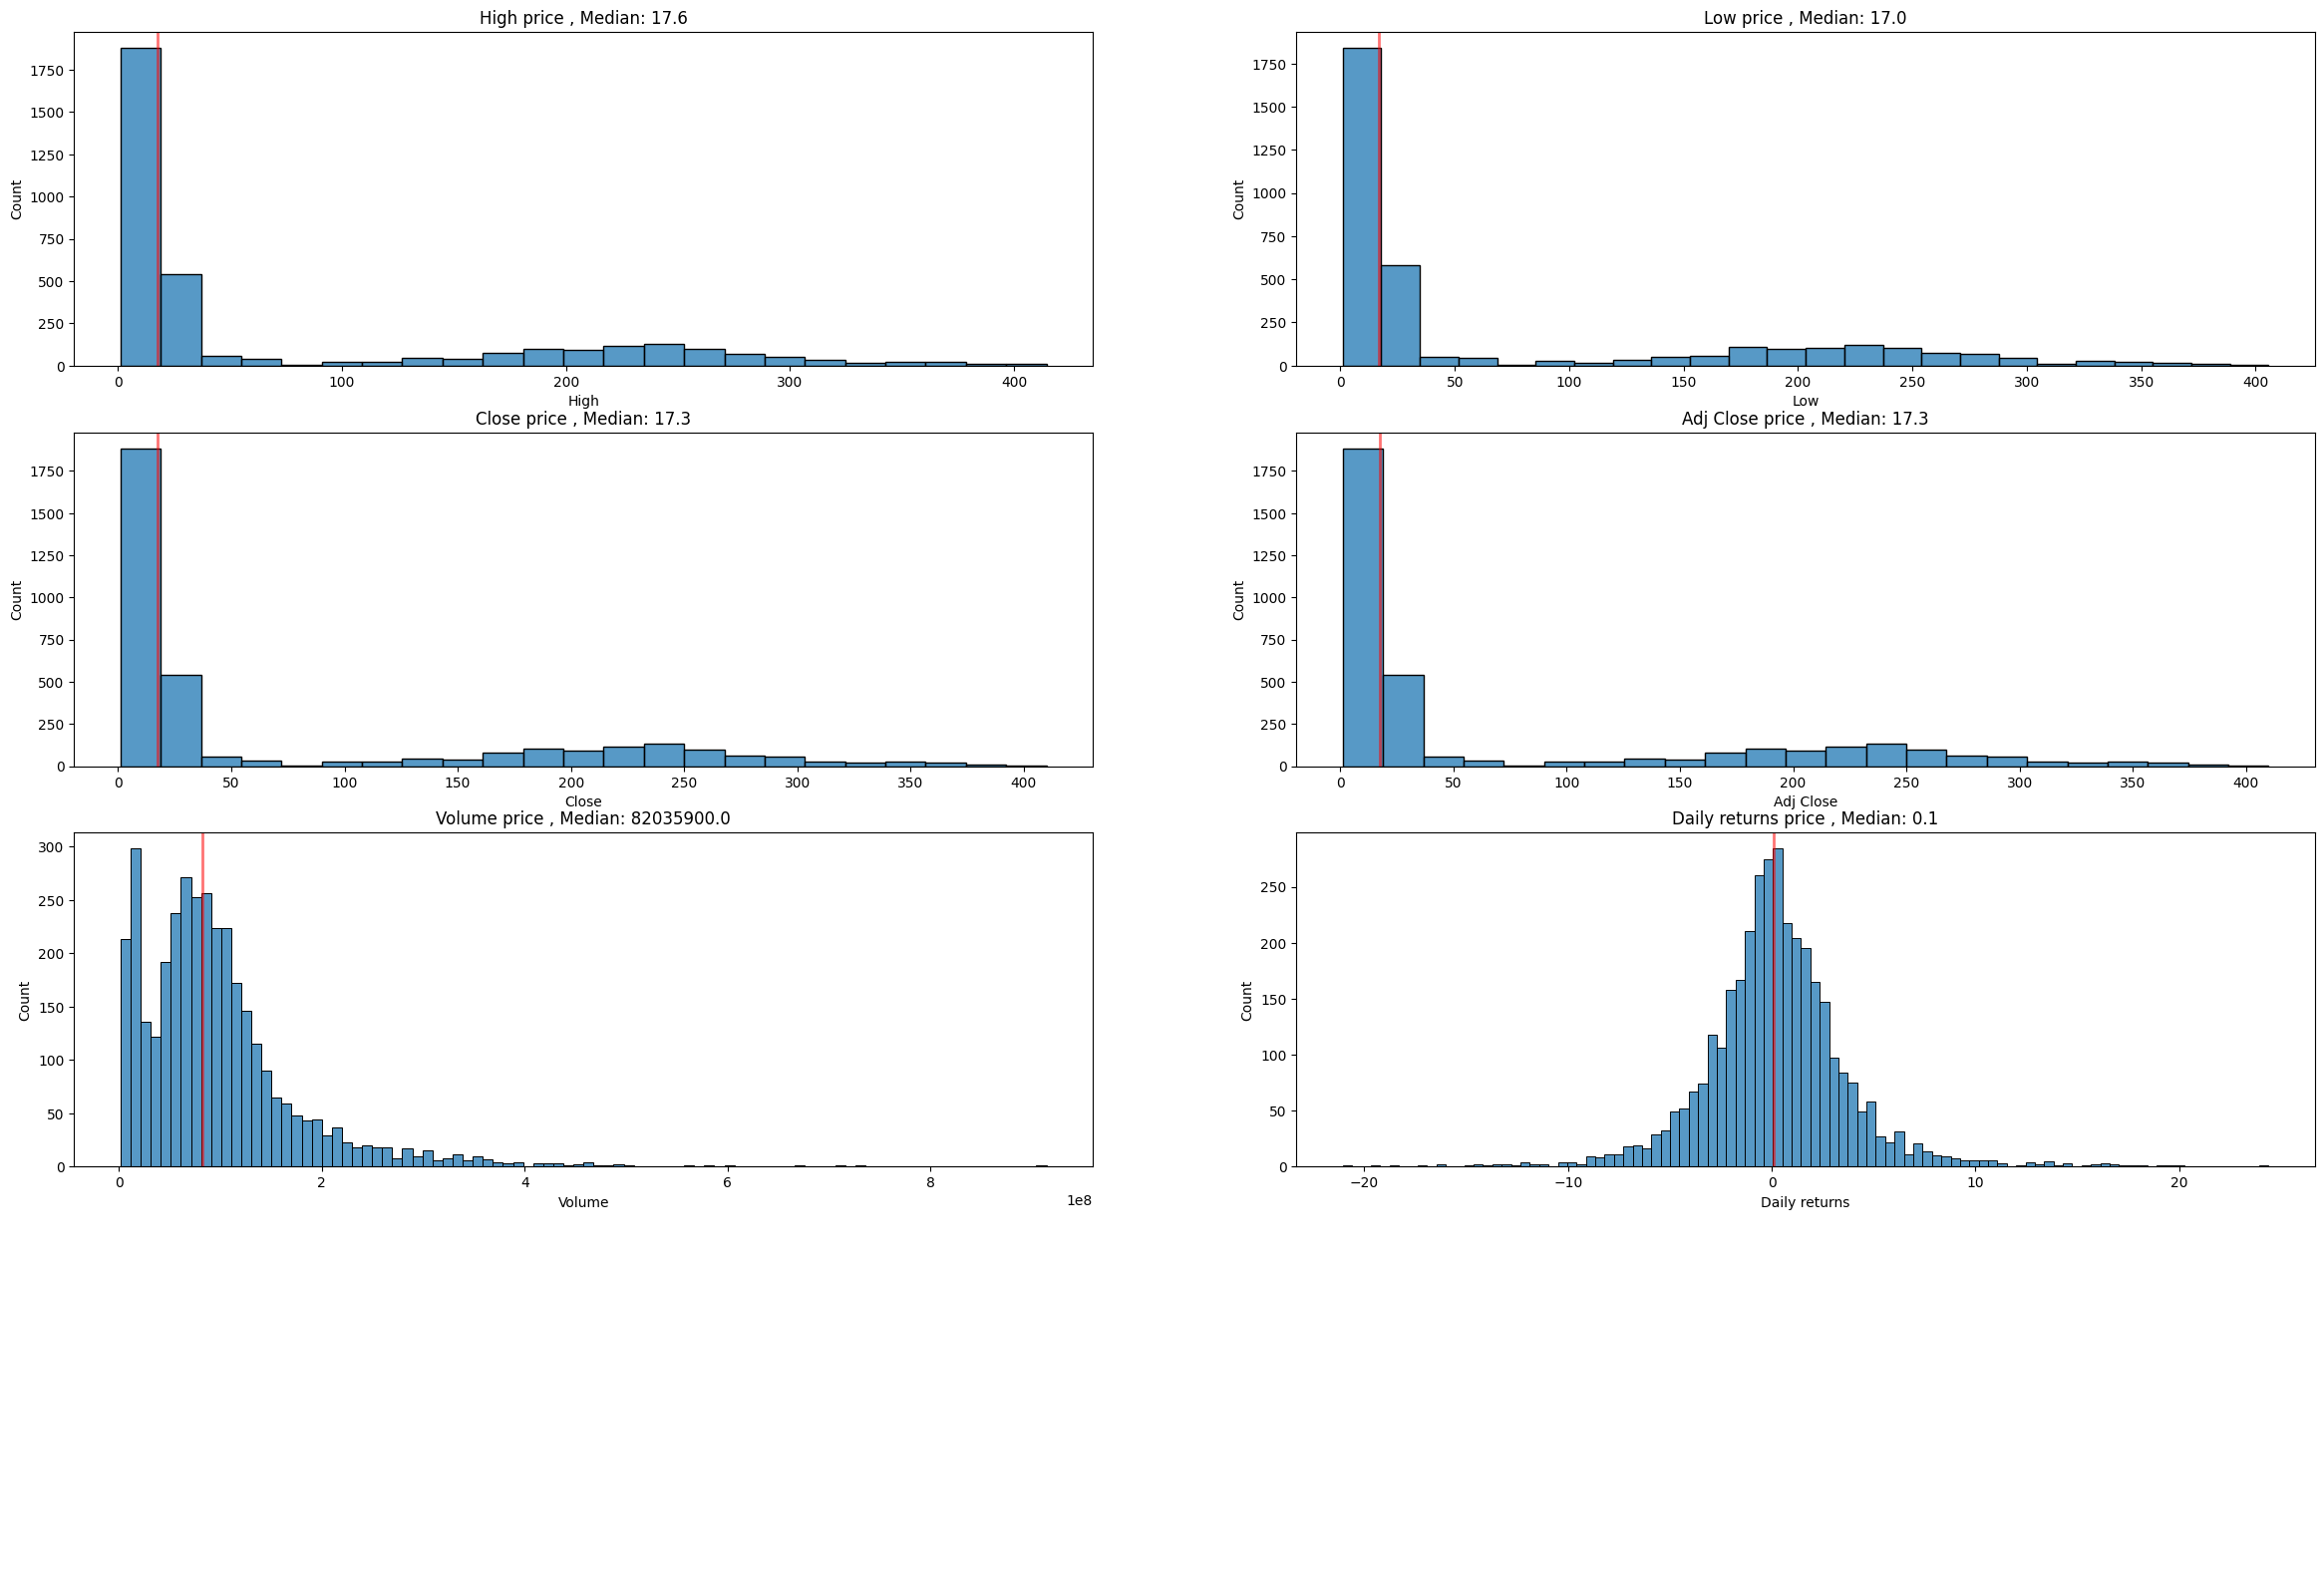

In [37]:
cols = tesla.columns.tolist()[1:] # all columns except date

fig, axes = plt.subplots(4,2, figsize=(29,20))

for i, ax in enumerate(axes.flatten()):
    if i < len(cols):
        sns.histplot(tesla[cols[i]], ax=ax)
        median = tesla[cols[i]].median()
        ax.set_title(f"{cols[i]} price , Median: {median:0.1f}")
        ax.axvline(median, color ='red', lw=2, alpha = 0.55)
    else:
        # Hide the subplot if there are no more columns to plot
        ax.axis('off')
print(cols)

The plot above shows the distribution of the prices, also showing the median price for the period 2004-2024

## Heatmap / correlation

Netflix

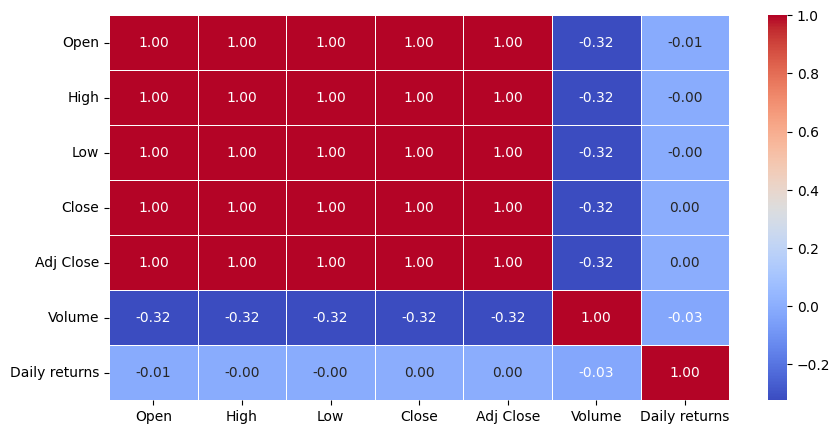

In [38]:
corr_matrix = netflix[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']].corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Create heatmap

fig.show() # Show plot

Tesla

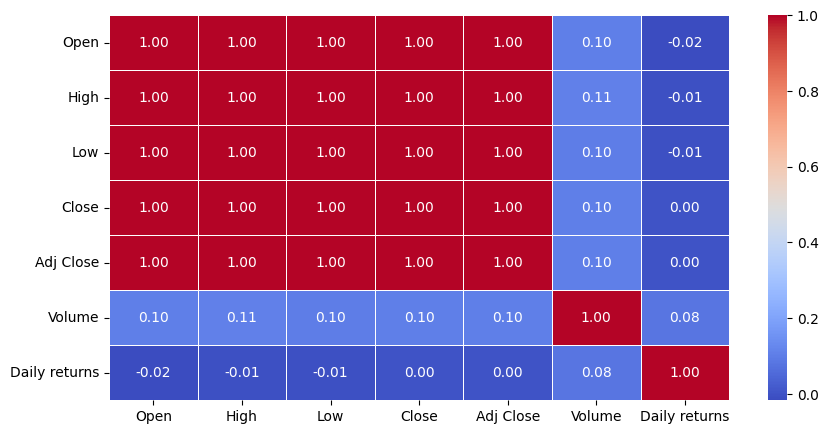

In [39]:
corr_matrix = tesla[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']].corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Create heatmap

fig.show() # Show plot

### Candlestick chart
Candlestick charts have been adopted most recently in cryptocurrency where increase in price is shown in green, and decrease is shown in red against time. The candlestick chart has an adjustable date axis to show the variation and trend in prices within a specific date

Netflix

In [41]:
import plotly.graph_objects as go

# Candlestick chart
figure = go.Figure(data=[go.Candlestick(
    x=netflix.reset_index()['Date'],
    open=netflix['Open'],
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Updating the layout with titles and defining graph size
figure.update_layout(
    title='Netflix Candlestick Chart (2004-2024)', # Graph title
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1000,
    height=800
)

# Show the chart

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [42]:
# Candlestick chart
figure = go.Figure(data=[go.Candlestick(
    x=tesla.reset_index()['Date'],
    open=tesla['Open'],
    high=tesla['High'],
    low=tesla['Low'],
    close=tesla['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Updating the layout with titles and defining graph size
figure.update_layout(
    title='Tesla Candlestick Chart (2004-2024)', # Graph title
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1000,
    height=800
)

# Show the chart

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Outlier detection
Box plots will be used for this

Netflix

In [43]:
netflix.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns'], dtype='object')

In [45]:
# Box plot to show outliers / percentile
fig = px.box(
    netflix,
    y=['Open', 'Close', 'High', 'Low', 'Adj Close'], # All columns except volume
    title = 'Outlier detection for Netflix (2004-2024)',
    width=1000,
    height=600
)

fig.show() # Show the plot

In [44]:
# Box plot to show outliers / percentile
fig = px.box(
    tesla,
    y=['Open', 'Close', 'High', 'Low', 'Adj Close'], # All columns except volume
    title = 'Outlier detection for Tesla (2004-2024)',
    width=1000,
    height=600
)

fig.show() # Show the plot

In [45]:
# sns.pairplot(batsl)

### Understanding the trading volume column

To understand and perform exploratory data analysis on the volume column, the following will be done:

1. Descriptive statistics
2. A histogram
3. Boxplot to show outliers

#### Descriptive statistics

#### Distribution - Histogram

#### Netflix

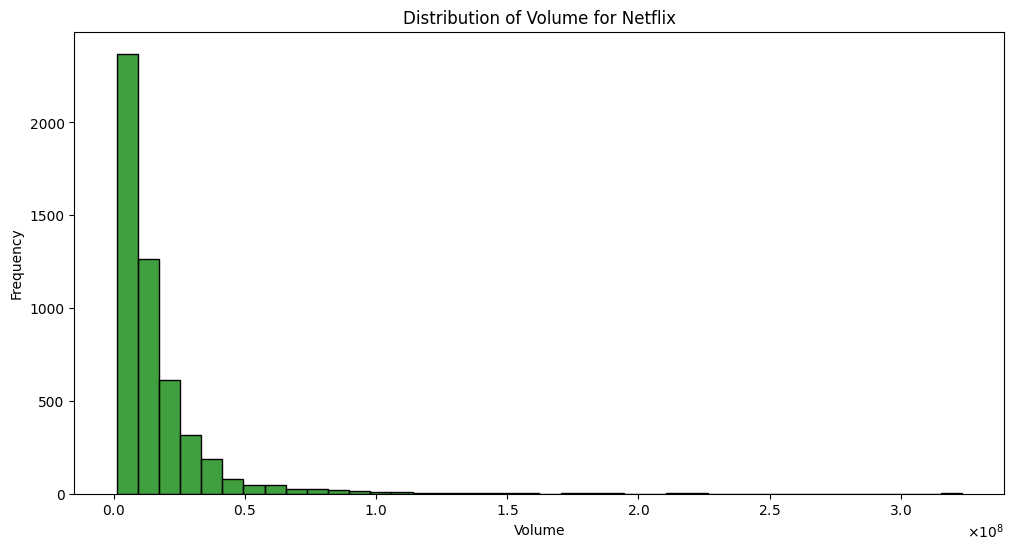

In [46]:
import matplotlib.ticker as ticker #To specify tick format

plt.figure(figsize=(12, 6)) # Create figure object with specific size

sns.histplot(netflix['Volume'], color='green', bins=40) # Plot histogram to show distribution
plt.title('Distribution of Volume for Netflix') # Set chart tile
plt.xlabel('Volume') # Set x axis title
plt.ylabel('Frequency') # Set y axis title

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True)) # To turn the x axis to normal figure format

plt.show() # Show plot

#### Box plot

In [47]:
fig = px.box(
    netflix,
    y=['Volume'], # Volume column
    title = 'Volume - Netflix (2004-2024)',
    width=1000,
    height=600)

fig.show() # Show the plot

#### Tesla

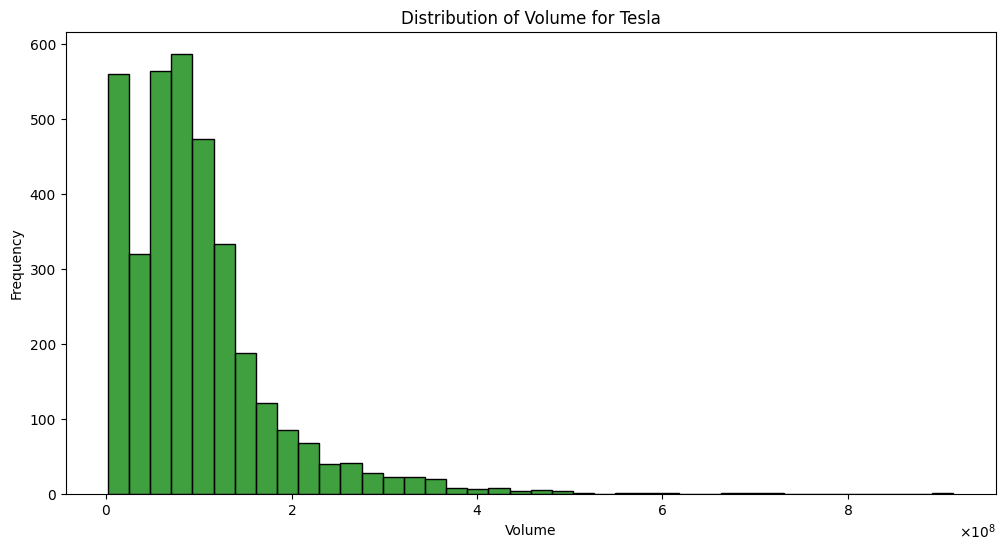

In [48]:
import matplotlib.ticker as ticker #To specify tick format

plt.figure(figsize=(12, 6)) # Create figure object with specific size

sns.histplot(tesla['Volume'], color='green', bins=40) # Plot histogram to show distribution
plt.title('Distribution of Volume for Tesla') # Set chart tile
plt.xlabel('Volume') # Set x axis title
plt.ylabel('Frequency') # Set y axis title

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True)) # To turn the x axis to normal figure format

plt.show() # Show plot

Box plot

In [49]:
fig = px.box(
    tesla,
    y=['Volume'], # Volume column
    title = 'Volume - Tesla (2004-2024)',
    width=1000,
    height=600)

fig.show() # Show the plot

The end!

## Data preprocessing

#### Duplicates

Netflix

In [50]:
duplicates = netflix.duplicated(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Daily returns']) # Duplicate rows

print(netflix[duplicates]) # Print duplicate rows

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily returns]
Index: []


Tesla

In [51]:
duplicates = tesla.duplicated(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Daily returns']) # Duplicate rows

print(tesla[duplicates]) # Print duplicate rows

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily returns]
Index: []


No duplicates!!!

### Feature engineering
Adding some calculated new features to improve the performance of the predictive model

Netflix

In [52]:
# Calculating the daily range, high minus low
netflix['Daily range'] = netflix['High'] - netflix['Low']

In [55]:
netflix.head() # Displayy first five rows

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000   
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500   
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500   
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100   
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500   

            Daily returns  Daily range  
Date                                    
2004-06-07            NaN     0.107143  
2004-06-08      -0.280370     0.082857  
2004-06-09      -2.218045     0.148572  
2004-06-10      -0.351446     0.121429  
2004-06-14      -5.258088     0.277143

In [53]:
inputs = (netflix['Close']).to_numpy()
outputs = (netflix['Close']).to_numpy()


netflix.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
netflix['Days'] = days
netflix.head(10)

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000   
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500   
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500   
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100   
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500   
2004-06-15  4.251429  4.357143  4.225714  4.247143   4.247143   7200200   
2004-06-16  4.242857  4.461429  4.242857  4.320000   4.320000   8957900   
2004-06-17  4.324286  4.327143  4.225714  4.260000   4.260000   8264200   
2004-06-18  4.270000  4.311429  4.194286  4.221429   4.221429   7858200   
2004-06-21  4.221429  4.240000  4.107143  4.131429   4.131429   7959000   

            Daily returns  Daily range  Days  
Date                                          
2004-06-07            NaN     0.107143     1  
2004-06-08      -0.280370     0.082857     2  
2004-06-09      -2.218045     0.148572     3  
2004-06-10      -0.351446     0.121429     4  
2004-06-14      -5.258088     0.277143     5  
2004-06-15       0.609128     0.131429     6  
2004-06-16       1.715445     0.218572     7  
2004-06-17      -1.388888     0.101429     8  
2004-06-18      -0.905431     0.117143     9  
2004-06-21      -2.131972     0.132857    10

Tesla

In [54]:
inputs = (tesla['Close']).to_numpy()
outputs = (tesla['Close']).to_numpy()


tesla.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
tesla['Days'] = days
tesla.head(10)

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   
2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500   
2010-07-08  1.076000  1.168000  1.038000  1.164000   1.164000  115671000   
2010-07-09  1.172000  1.193333  1.103333  1.160000   1.160000   60759000   
2010-07-12  1.196667  1.204667  1.133333  1.136667   1.136667   33037500   
2010-07-13  1.159333  1.242667  1.126667  1.209333   1.209333   40201500   

            Daily returns  Days  
Date                             
2010-06-29            NaN     1  
2010-06-30      -0.251148     2  
2010-07-01      -7.847274     3  
2010-07-02     -12.568307     4  
2010-07-06     -16.093748     5  
2010-07-07      -1.924298     6  
2010-07-08      10.506363     7  
2010-07-09      -0.343648     8  
2010-07-12      -2.011462     9  
2010-07-13       6.392895    10

In [55]:
tesla.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily returns    1
Days             0
dtype: int64

In [56]:
inputs = (tesla['Close']).to_numpy()
outputs = (tesla['Close']).to_numpy()


tesla.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
tesla['Days'] = days
tesla.head(10)

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   
2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500   
2010-07-08  1.076000  1.168000  1.038000  1.164000   1.164000  115671000   
2010-07-09  1.172000  1.193333  1.103333  1.160000   1.160000   60759000   
2010-07-12  1.196667  1.204667  1.133333  1.136667   1.136667   33037500   
2010-07-13  1.159333  1.242667  1.126667  1.209333   1.209333   40201500   

            Daily returns  Days  
Date                             
2010-06-29            NaN     1  
2010-06-30      -0.251148     2  
2010-07-01      -7.847274     3  
2010-07-02     -12.568307     4  
2010-07-06     -16.093748     5  
2010-07-07      -1.924298     6  
2010-07-08      10.506363     7  
2010-07-09      -0.343648     8  
2010-07-12      -2.011462     9  
2010-07-13       6.392895    10

#### Rolling statistics
Which is when you focus on a particular window (number of observations) and make rolling calculations. A copy of the Netflix and Tesla datasets are made to add rolling statistics to the dataframe. Prediction will be made using netflix and netflix_rolling and tesla and tesla_rolling to compare results


### Netflix

In [61]:
# Rolling Mean
netflix['Rolling_Mean_5'] = netflix['Close'].rolling(window=5).mean()
netflix['Rolling_Mean_20'] = netflix['Close'].rolling(window=20).mean()

# Rolling Standard Deviation
netflix['Rolling_Std_5'] = netflix['Close'].rolling(window=5).std()
netflix['Rolling_Std_20'] = netflix['Close'].rolling(window=20).std()

# Rolling Sum
netflix['Rolling_Sum_5'] = netflix['Close'].rolling(window=5).sum()
netflix['Rolling_Sum_20'] = netflix['Close'].rolling(window=20).sum()

# Rolling Minimum and Maximum
netflix['Rolling_Min_5'] = netflix['Close'].rolling(window=5).min()
netflix['Rolling_Max_5'] = netflix['Close'].rolling(window=5).max()

netflix['Rolling_Min_20'] = netflix['Close'].rolling(window=20).min()
netflix['Rolling_Max_20'] = netflix['Close'].rolling(window=20).max()

# Rolling Variance
netflix['Rolling_Var_5'] = netflix['Close'].rolling(window=5).var()
netflix['Rolling_Var_20'] = netflix['Close'].rolling(window=20).var()


In [62]:
netflix.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000   
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500   
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500   
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100   
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500   

            Daily returns  Daily range  Days  Rolling_Mean_5  ...  \
Date                                                          ...   
2004-06-07            NaN     0.107143     1             NaN  ...   
2004-06-08      -0.280370     0.082857     2             NaN  ...   
2004-06-09      -2.218045     0.148572     3             NaN  ...   
2004-06-10      -0.351446     0.121429     4             NaN  ...   
2004-06-14      -5.258088     0.277143     5        4.461429  ...   

            Rolling_Std_5  Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  \
Date                                                                       
2004-06-07            NaN             NaN            NaN             NaN   
2004-06-08            NaN             NaN            NaN             NaN   
2004-06-09            NaN             NaN            NaN             NaN   
2004-06-10            NaN             NaN            NaN             NaN   
2004-06-14       0.146284             NaN      22.307143             NaN   

            Rolling_Min_5  Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  \
Date                                                                       
2004-06-07            NaN            NaN             NaN             NaN   
2004-06-08            NaN            NaN             NaN             NaN   
2004-06-09            NaN            NaN             NaN             NaN   
2004-06-10            NaN            NaN             NaN             NaN   
2004-06-14       4.221429       4.585714             NaN             NaN   

            Rolling_Var_5  Rolling_Var_20  
Date                                       
2004-06-07            NaN             NaN  
2004-06-08            NaN             NaN  
2004-06-09            NaN             NaN  
2004-06-10            NaN             NaN  
2004-06-14       0.021399             NaN  

[5 rows x 21 columns]

### Tesla

In [63]:
# Rolling Mean
tesla['Rolling_Mean_5'] = tesla['Close'].rolling(window=5).mean()
tesla['Rolling_Mean_20'] = tesla['Close'].rolling(window=20).mean()

# Rolling Standard Deviation
tesla['Rolling_Std_5'] = tesla['Close'].rolling(window=5).std()
tesla['Rolling_Std_20'] = tesla['Close'].rolling(window=20).std()

# Rolling Sum
tesla['Rolling_Sum_5'] = tesla['Close'].rolling(window=5).sum()
tesla['Rolling_Sum_20'] = tesla['Close'].rolling(window=20).sum()

# Rolling Minimum and Maximum
tesla['Rolling_Min_5'] = tesla['Close'].rolling(window=5).min()
tesla['Rolling_Max_5'] = tesla['Close'].rolling(window=5).max()

tesla['Rolling_Min_20'] = tesla['Close'].rolling(window=20).min()
tesla['Rolling_Max_20'] = tesla['Close'].rolling(window=20).max()

# Rolling Variance
tesla['Rolling_Var_5'] = tesla['Close'].rolling(window=5).var()
tesla['Rolling_Var_20'] = tesla['Close'].rolling(window=20).var()


In [64]:
tesla.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Daily returns  Days  Rolling_Mean_5  Rolling_Mean_20  \
Date                                                               
2010-06-29            NaN     1             NaN              NaN   
2010-06-30      -0.251148     2             NaN              NaN   
2010-07-01      -7.847274     3             NaN              NaN   
2010-07-02     -12.568307     4             NaN              NaN   
2010-07-06     -16.093748     5        1.399867              NaN   

            Rolling_Std_5  Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  \
Date                                                                       
2010-06-29            NaN             NaN            NaN             NaN   
2010-06-30            NaN             NaN            NaN             NaN   
2010-07-01            NaN             NaN            NaN             NaN   
2010-07-02            NaN             NaN            NaN             NaN   
2010-07-06       0.222198             NaN       6.999334             NaN   

            Rolling_Min_5  Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  \
Date                                                                       
2010-06-29            NaN            NaN             NaN             NaN   
2010-06-30            NaN            NaN             NaN             NaN   
2010-07-01            NaN            NaN             NaN             NaN   
2010-07-02            NaN            NaN             NaN             NaN   
2010-07-06          1.074       1.592667             NaN             NaN   

            Rolling_Var_5  Rolling_Var_20  
Date                                       
2010-06-29            NaN             NaN  
2010-06-30            NaN             NaN  
2010-07-01            NaN             NaN  
2010-07-02            NaN             NaN  
2010-07-06       0.049372             NaN

### Missing values

In [65]:
netflix.isnull().sum() #Display number of missing values in each column

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Daily returns       1
Daily range         0
Days                0
Rolling_Mean_5      4
Rolling_Mean_20    19
Rolling_Std_5       4
Rolling_Std_20     19
Rolling_Sum_5       4
Rolling_Sum_20     19
Rolling_Min_5       4
Rolling_Max_5       4
Rolling_Min_20     19
Rolling_Max_20     19
Rolling_Var_5       4
Rolling_Var_20     19
dtype: int64

In [66]:
tesla.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Daily returns       1
Days                0
Rolling_Mean_5      4
Rolling_Mean_20    19
Rolling_Std_5       4
Rolling_Std_20     19
Rolling_Sum_5       4
Rolling_Sum_20     19
Rolling_Min_5       4
Rolling_Max_5       4
Rolling_Min_20     19
Rolling_Max_20     19
Rolling_Var_5       4
Rolling_Var_20     19
dtype: int64

In [67]:
# Dropping the first 19 rows in the data to remove the missing value rows in the rolling statistics columns
netflix.dropna(inplace=True)
netflix.isnull().sum() # Display number of missing values in each column

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Daily returns      0
Daily range        0
Days               0
Rolling_Mean_5     0
Rolling_Mean_20    0
Rolling_Std_5      0
Rolling_Std_20     0
Rolling_Sum_5      0
Rolling_Sum_20     0
Rolling_Min_5      0
Rolling_Max_5      0
Rolling_Min_20     0
Rolling_Max_20     0
Rolling_Var_5      0
Rolling_Var_20     0
dtype: int64

In [68]:
tesla.dropna(inplace=True)
tesla.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Daily returns      0
Days               0
Rolling_Mean_5     0
Rolling_Mean_20    0
Rolling_Std_5      0
Rolling_Std_20     0
Rolling_Sum_5      0
Rolling_Sum_20     0
Rolling_Min_5      0
Rolling_Max_5      0
Rolling_Min_20     0
Rolling_Max_20     0
Rolling_Var_5      0
Rolling_Var_20     0
dtype: int64

### NETFLIX

Define feature and target data

<Axes: title={'center': 'Close price vs Adjusted close price for Netflix'}, xlabel='Date'>

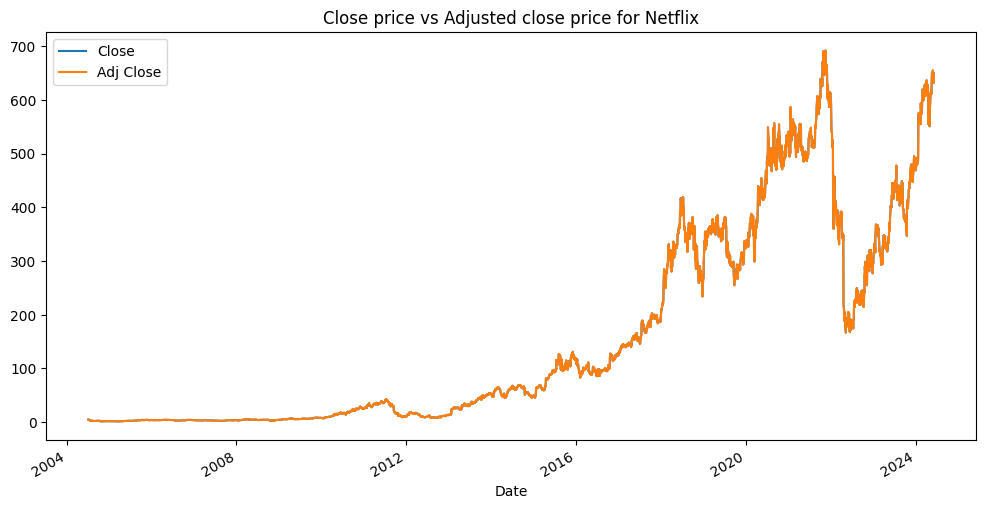

In [69]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
netflix.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for Netflix')

Netflix close and adjusted close price are very similar, so in building the model, the close column will be dropped so that it does not leak information to the model


In [70]:
feature_netflix = netflix.drop(['Adj Close', 'Close'], axis=1) # Remove cols date and adjusted close
target_netflix = netflix['Adj Close'] # Target variable is the adj close

In [71]:
feature_netflix.head()

Open      High       Low    Volume  Daily returns  \
Date                                                                
2004-07-06  4.521429  4.850000  4.488571  15732500       3.744964   
2004-07-07  4.794286  4.981429  4.678571  13262900      -0.507142   
2004-07-08  4.641429  4.771429  4.538571  15152200      -4.317860   
2004-07-09  4.620000  4.775714  4.614286   6634600       4.763402   
2004-07-12  4.761429  4.777143  4.572857   7228900      -2.542615   

            Daily range  Days  Rolling_Mean_5  Rolling_Mean_20  Rolling_Std_5  \
Date                                                                            
2004-07-06     0.361429    20        4.913143         4.522357       0.227599   
2004-07-07     0.302858    21        4.889428         4.531286       0.237505   
2004-07-08     0.232858    22        4.772571         4.530572       0.225054   
2004-07-09     0.161428    23        4.700571         4.545786       0.105848   
2004-07-12     0.204286    24        4.708286         4.555714       0.099321   

            Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  Rolling_Min_5  \
Date                                                                       
2004-07-06        0.306843      24.565713       90.447144       4.615714   
2004-07-07        0.311349      24.447142       90.625716       4.615714   
2004-07-08        0.311265      23.862856       90.611430       4.558571   
2004-07-09        0.315628      23.502856       90.915715       4.558571   
2004-07-12        0.315769      23.541428       91.114287       4.558571   

            Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  Rolling_Var_5  \
Date                                                                       
2004-07-06       5.142857        4.131429        5.142857       0.051801   
2004-07-07       5.142857        4.131429        5.142857       0.056409   
2004-07-08       5.135714        4.131429        5.142857       0.050649   
2004-07-09       4.788571        4.131429        5.142857       0.011204   
2004-07-12       4.788571        4.131429        5.142857       0.009865   

            Rolling_Var_20  
Date                        
2004-07-06        0.094153  
2004-07-07        0.096938  
2004-07-08        0.096886  
2004-07-09        0.099621  
2004-07-12        0.099710

In [72]:
target_netflix.head()

Date
2004-07-06    4.788571
2004-07-07    4.764286
2004-07-08    4.558571
2004-07-09    4.775714
2004-07-12    4.654286
Name: Adj Close, dtype: float64

#### TESLA

<Axes: title={'center': 'Close price vs Adjusted close price for Tesla'}, xlabel='Date'>

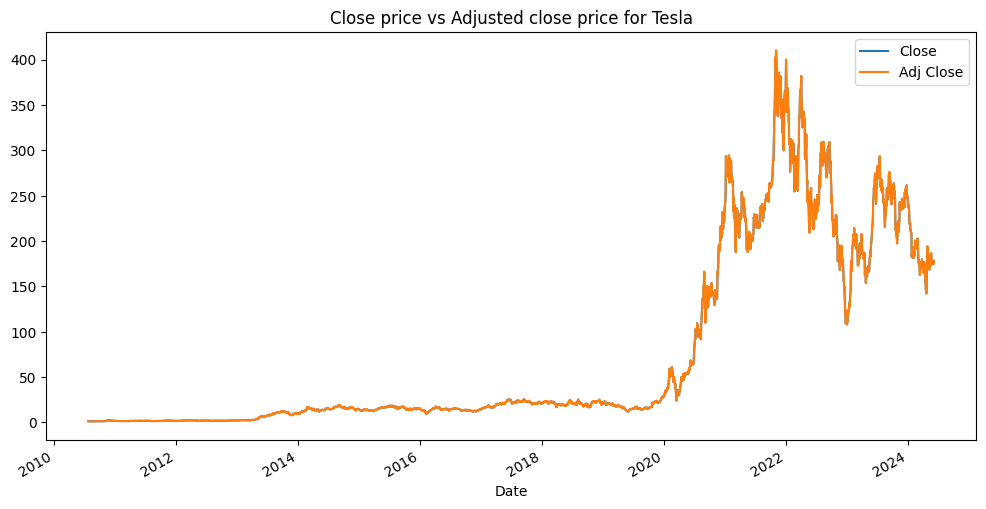

In [73]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
tesla.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for Tesla')

Just like netflix, the 'Adj Close' and 'Close columns are very similar'

In [74]:
feature_tesla = tesla.drop(['Adj Close','Close'], axis=1) # Remove cols date and adjusted close
target_tesla = tesla['Adj Close'] # Target variable is the adj close

In [75]:
feature_tesla.head()

Open      High       Low    Volume  Daily returns  Days  \
Date                                                                      
2010-07-27  1.394000  1.412000  1.350667   9295500      -1.909331    20   
2010-07-28  1.370000  1.393333  1.367333   7008000       0.827225    21   
2010-07-29  1.384667  1.392000  1.333333   9240000      -1.785663    22   
2010-07-30  1.346667  1.362667  1.303333   6403500      -2.014798    23   
2010-08-02  1.366667  1.398000  1.355333  10771500       4.914802    24   

            Rolling_Mean_5  Rolling_Mean_20  Rolling_Std_5  Rolling_Std_20  \
Date                                                                         
2010-07-27        1.386800         1.324767       0.027918        0.153098   
2010-07-28        1.393467         1.314200       0.018841        0.140401   
2010-07-29        1.384800         1.302600       0.024269        0.125303   
2010-07-30        1.366800         1.295867       0.025593        0.119665   
2010-08-02        1.366400         1.301600       0.025018        0.121596   

            Rolling_Sum_5  Rolling_Sum_20  Rolling_Min_5  Rolling_Max_5  \
Date                                                                      
2010-07-27       6.934000       26.495334       1.348000       1.419333   
2010-07-28       6.967333       26.284000       1.370000       1.419333   
2010-07-29       6.924000       26.052000       1.356667       1.419333   
2010-07-30       6.834000       25.917333       1.329333       1.396667   
2010-08-02       6.832000       26.032000       1.329333       1.394667   

            Rolling_Min_20  Rolling_Max_20  Rolling_Var_5  Rolling_Var_20  
Date                                                                       
2010-07-27        1.053333        1.592667       0.000779        0.023439  
2010-07-28        1.053333        1.588667       0.000355        0.019712  
2010-07-29        1.053333        1.464000       0.000589        0.015701  
2010-07-30        1.053333        1.460667       0.000655        0.014320  
2010-08-02        1.053333        1.460667       0.000626        0.014786

In [76]:
target_tesla.head()

Date
2010-07-27    1.370000
2010-07-28    1.381333
2010-07-29    1.356667
2010-07-30    1.329333
2010-08-02    1.394667
Name: Adj Close, dtype: float64

#### **First model: Support Vector Regressor**

Import necessary libraries

In [77]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.dates as mdates
import cufflinks as cf
from matplotlib.pyplot import figure
from tqdm import tqdm
import plotly.graph_objects as go
cf.go_offline()
cf.set_config_file(offline = True)

### Normalization
Normalization is a process used in data preprocessing to adjust the values of numerical data to a common scale, typically without distorting differences in the ranges of values.

MinMaxScaler scales the data to range from 0 to 1

A function normalize_featuresDF was built to normalize the features

In [78]:
def normalize_featuresDF(df):
    """
    created to normalize df data - range between 0-1
    args:
    df : the data we pulled up from yahoo for the stock
    return: normalized_features_df : data after it is normalized

    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(
        columns=feature_columns,
        data=feature_minmax_data,
        index=df.index
      )

    return normalized_features_df

print(normalize_featuresDF.__doc__)


    created to normalize df data - range between 0-1
    args:
    df : the data we pulled up from yahoo for the stock
    return: normalized_features_df : data after it is normalized

    


Two functions were built 'split_ValidationSet' and 'split_Final_df', the first was to remove the data for the last 90 days as the validation set. The second was to return the feature and target sets after the validation set has been removed

In [79]:
def split_ValidationSet(features_df, target_df, length=90):
    """
    The function "split_ValidationSet" is just to get the last 90 days
    data and make it the validation set. It is done to validate the model on the most recent data.
    The method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_df
        length: number of observations to be used for the validation
    returns :
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1) # This shifts the target_df one position up
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]

    return validation_x, validation_y

# Since the last 90 rows have been assigned as the validation set, we need to split the others into features and target
#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return:
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length] # Up unto the last v_length rows which has been defined as 90
    final_target_df = target_df[:-v_length]

    return final_features_df, final_target_df

The function 'split_Train_Test_DF' was to split into X_train, X_test, y_train and y_test

In [80]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
# Now splitting the features and targets into training and testing sets
# Time series splitting was used in order to not disturb the chronological order of the data
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=10):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set

    return:
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()

    return x_train, y_train, x_test, y_test

In [81]:
def DataSet_Graph():
    """
    This chat just shows how the time series data was split into training, test, and validation sets


    Chart shows 2 different sets(Train,Test,Validation) into single plot
    Since it is time series data, it shouldnot be mixed
    """
    t=y_test.astype(float)
    v = target_df[-90:-1].values.ravel()
    plt.figure(figsize = (20,10))
    plt.plot(y_train, label='trainning_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days',fontsize = 18)
    plt.ylabel('Price',fontsize = 18)
    plt.title('Split dataset into training/validation/test set',fontsize = 20)
    plt.legend()

Three functions were defined to:
1. Calculate the rmse score and r^2 score on the validation sets (model_validateResult) and test sets (bestModel_ValidateResult)
2. PLot graphs of y_pred against y_test
3. Create a dataframe with y_pred and y_test to compare values

In [82]:
#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Uses the validation data
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """

    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    R2_Score = r2_score(validation_y, prediction)

    #trendline for actual vs prediction

    plt.figure(figsize = (23,10))
    plt.plot(validation_y.index, prediction, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=8,label = 'Prediction data')
    plt.plot(validation_y.index, validation_y, color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=8,label = 'Actual data')
    plt.plot(figsize = (23,10))
    plt.ylabel('Price',fontsize = 20)
    plt.xlabel('Date',fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual',fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score




#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Uses the test data
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    #I am giving testing set for the evaluation
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)

    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    plt.figure(figsize = (23,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(model_name + 'Prediction Vs Actual',fontsize = 20)
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days',fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.legend();
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score



def value_Compare(model):
    """
    This function creates a new dataframe which will include the predicted values and true values as new columns
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model
    return :
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    return df

'model_SVR' was built to build the SVR model without hyperparameter tuning, while 'model_SVRTuning' included grid search

In [83]:
def model_SVR(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }

    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    print(grid_search_SVR_feat.best_params_)

    return model

### **Support Vector Regressor using Netflix Stock Data**

Normalizing the feature set using the 'normalize_featuresDF' function

In [84]:
# calling the normalizing function defined above is the first step
normalized_features_df = normalize_featuresDF(feature_netflix)
target_df = target_netflix

In [85]:
normalized_features_df.head()

Open      High       Low    Volume  Daily returns  \
Date                                                                
2004-07-06  0.004662  0.005049  0.004696  0.045268       0.537128   
2004-07-07  0.005056  0.005237  0.004973  0.037605       0.485978   
2004-07-08  0.004835  0.004937  0.004769  0.043467       0.440137   
2004-07-09  0.004804  0.004943  0.004879  0.017037       0.549379   
2004-07-12  0.005009  0.004945  0.004819  0.018881       0.461492   

            Daily range      Days  Rolling_Mean_5  Rolling_Mean_20  \
Date                                                                 
2004-07-06     0.006121  0.000000        0.005272         0.004665   
2004-07-07     0.005092  0.000199        0.005237         0.004678   
2004-07-08     0.003863  0.000399        0.005066         0.004677   
2004-07-09     0.002609  0.000598        0.004961         0.004700   
2004-07-12     0.003362  0.000798        0.004972         0.004715   

            Rolling_Std_5  Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  \
Date                                                                       
2004-07-06       0.003137        0.003369       0.005272        0.004665   
2004-07-07       0.003276        0.003424       0.005237        0.004678   
2004-07-08       0.003101        0.003423       0.005066        0.004677   
2004-07-09       0.001428        0.003475       0.004961        0.004700   
2004-07-12       0.001336        0.003477       0.004972        0.004715   

            Rolling_Min_5  Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  \
Date                                                                       
2004-07-06       0.004905       0.005523        0.004409        0.005237   
2004-07-07       0.004905       0.005523        0.004409        0.005237   
2004-07-08       0.004821       0.005513        0.004409        0.005237   
2004-07-09       0.004821       0.005010        0.004409        0.005237   
2004-07-12       0.004821       0.005010        0.004409        0.005237   

            Rolling_Var_5  Rolling_Var_20  
Date                                       
2004-07-06       0.000010        0.000014  
2004-07-07       0.000011        0.000014  
2004-07-08       0.000010        0.000014  
2004-07-09       0.000002        0.000014  
2004-07-12       0.000002        0.000014

In [86]:
target_df.head()

Date
2004-07-06    4.788571
2004-07-07    4.764286
2004-07-08    4.558571
2004-07-09    4.775714
2004-07-12    4.654286
Name: Adj Close, dtype: float64

In [87]:
#Splitting validation sets from the whole dataset, the length has already been defined in the
# function as 90, which will be the data from the last 90 days in the data
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

#Now returning features and targets left after removing the validation sets

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

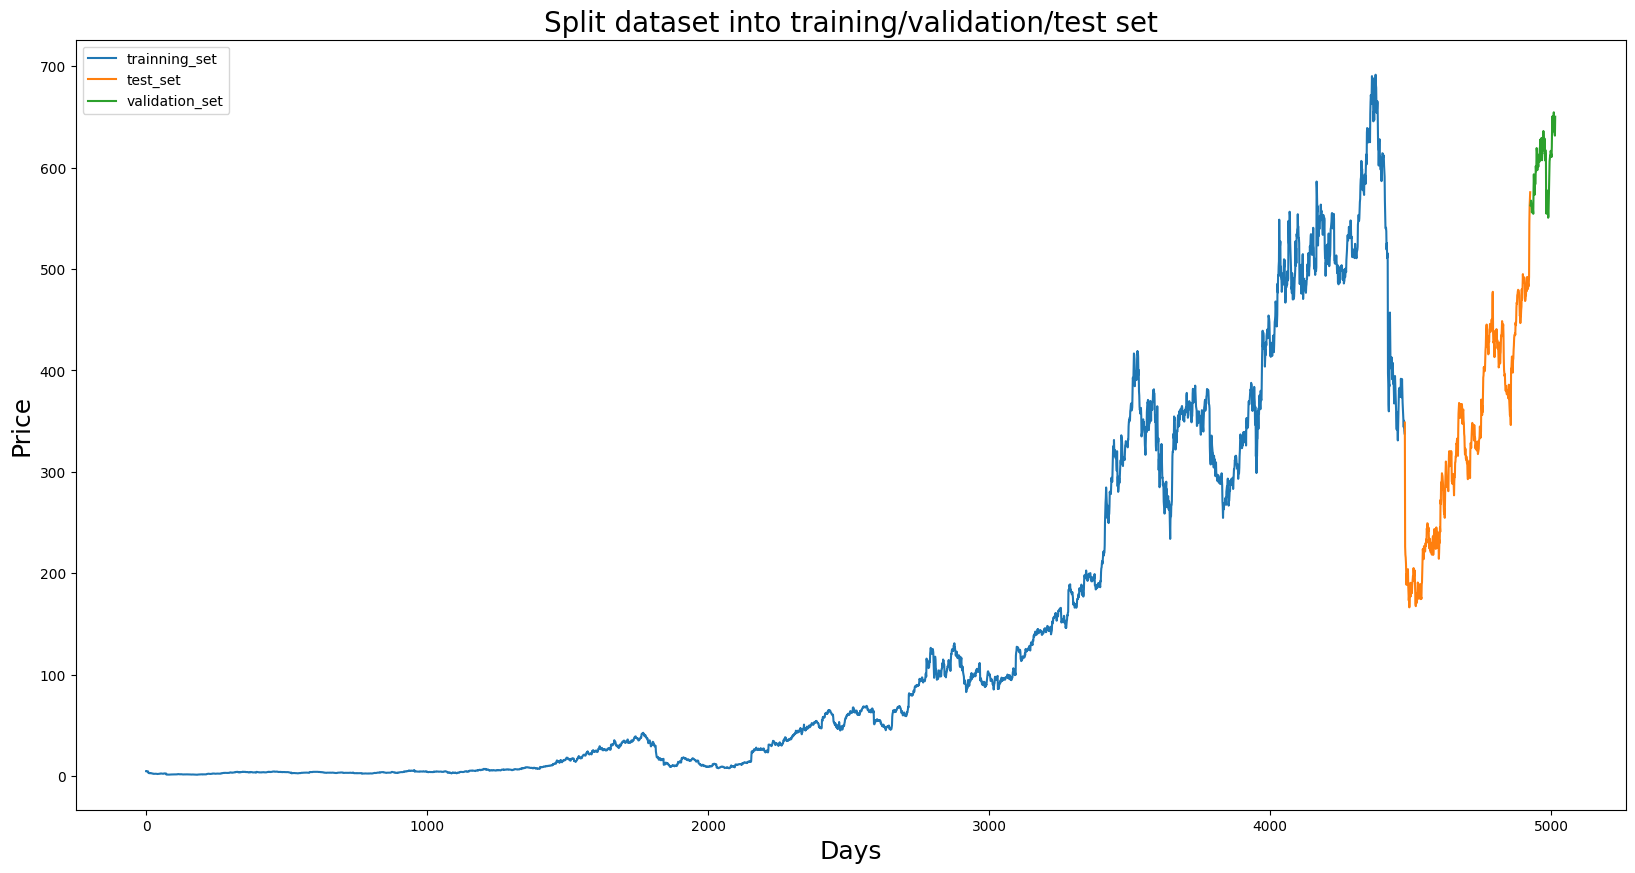

In [88]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

The validation set(Green) is the most recent

### Support Vector Machines for Netflix

In [91]:
from sklearn.svm import SVR

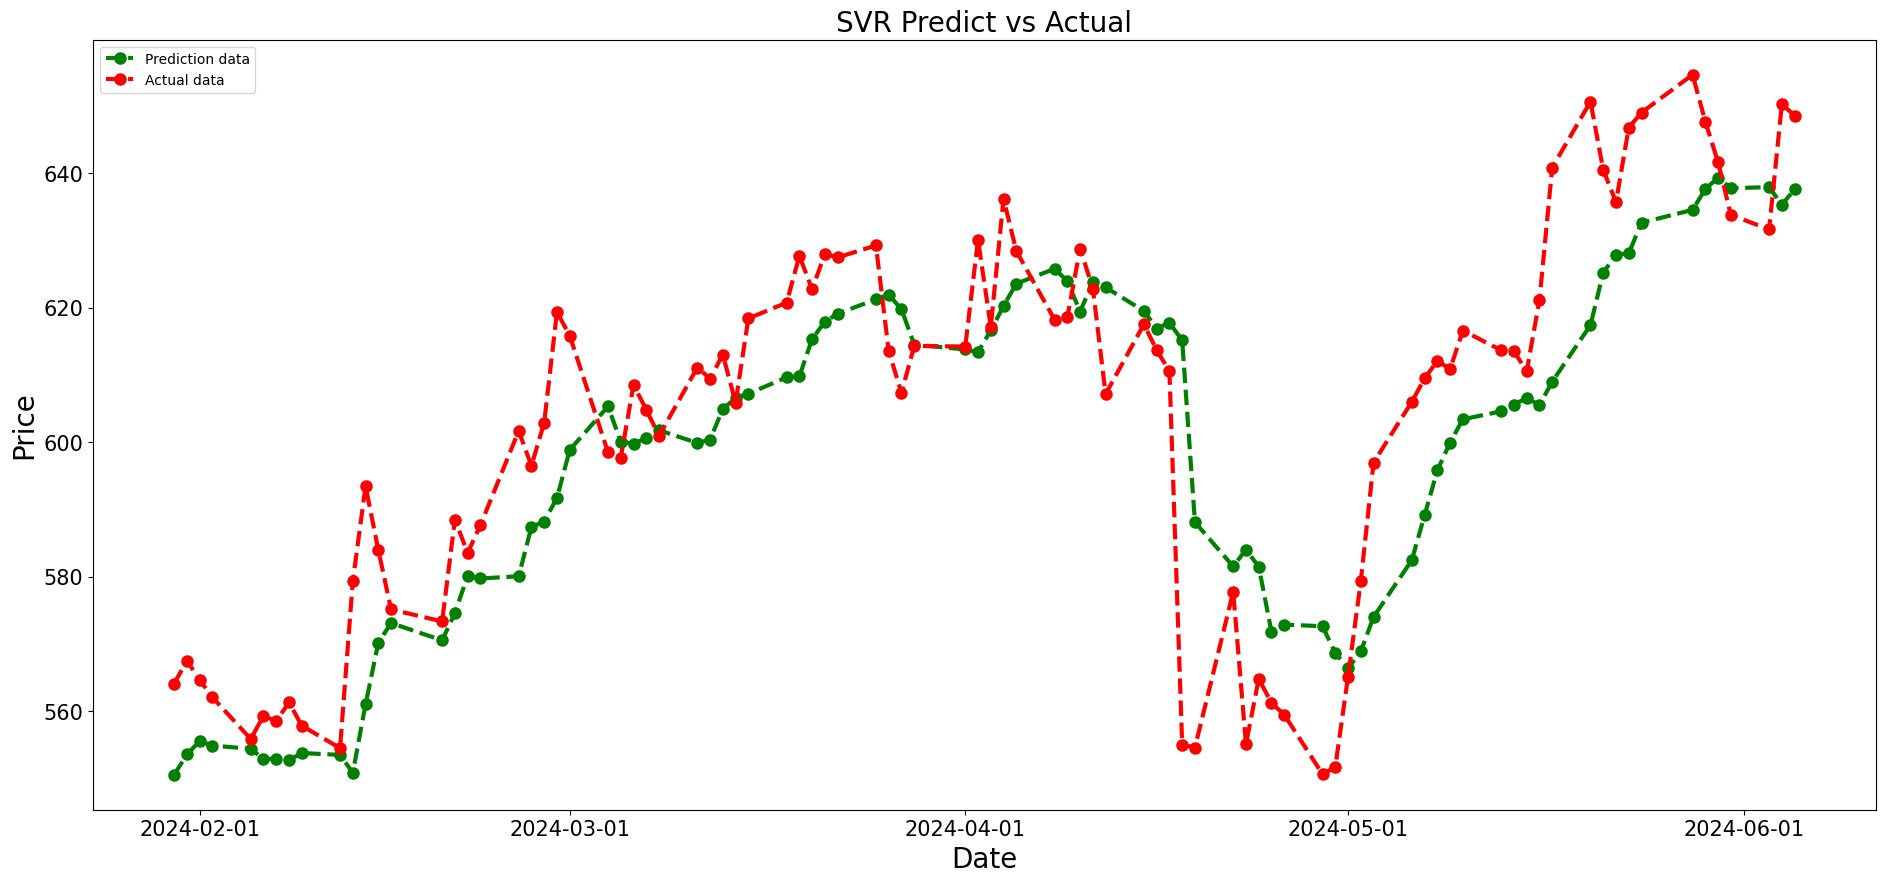

SVR RMSE:  15.28993006157425
SVR R2 score:  0.7201894932597379


In [92]:
#SVR model
# Using the validation set
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

### WIth hyperparameter tuning using grid search

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model  RMSE:  3.171258447935884
SVR_Best Model  R2 score:  0.998928695199701


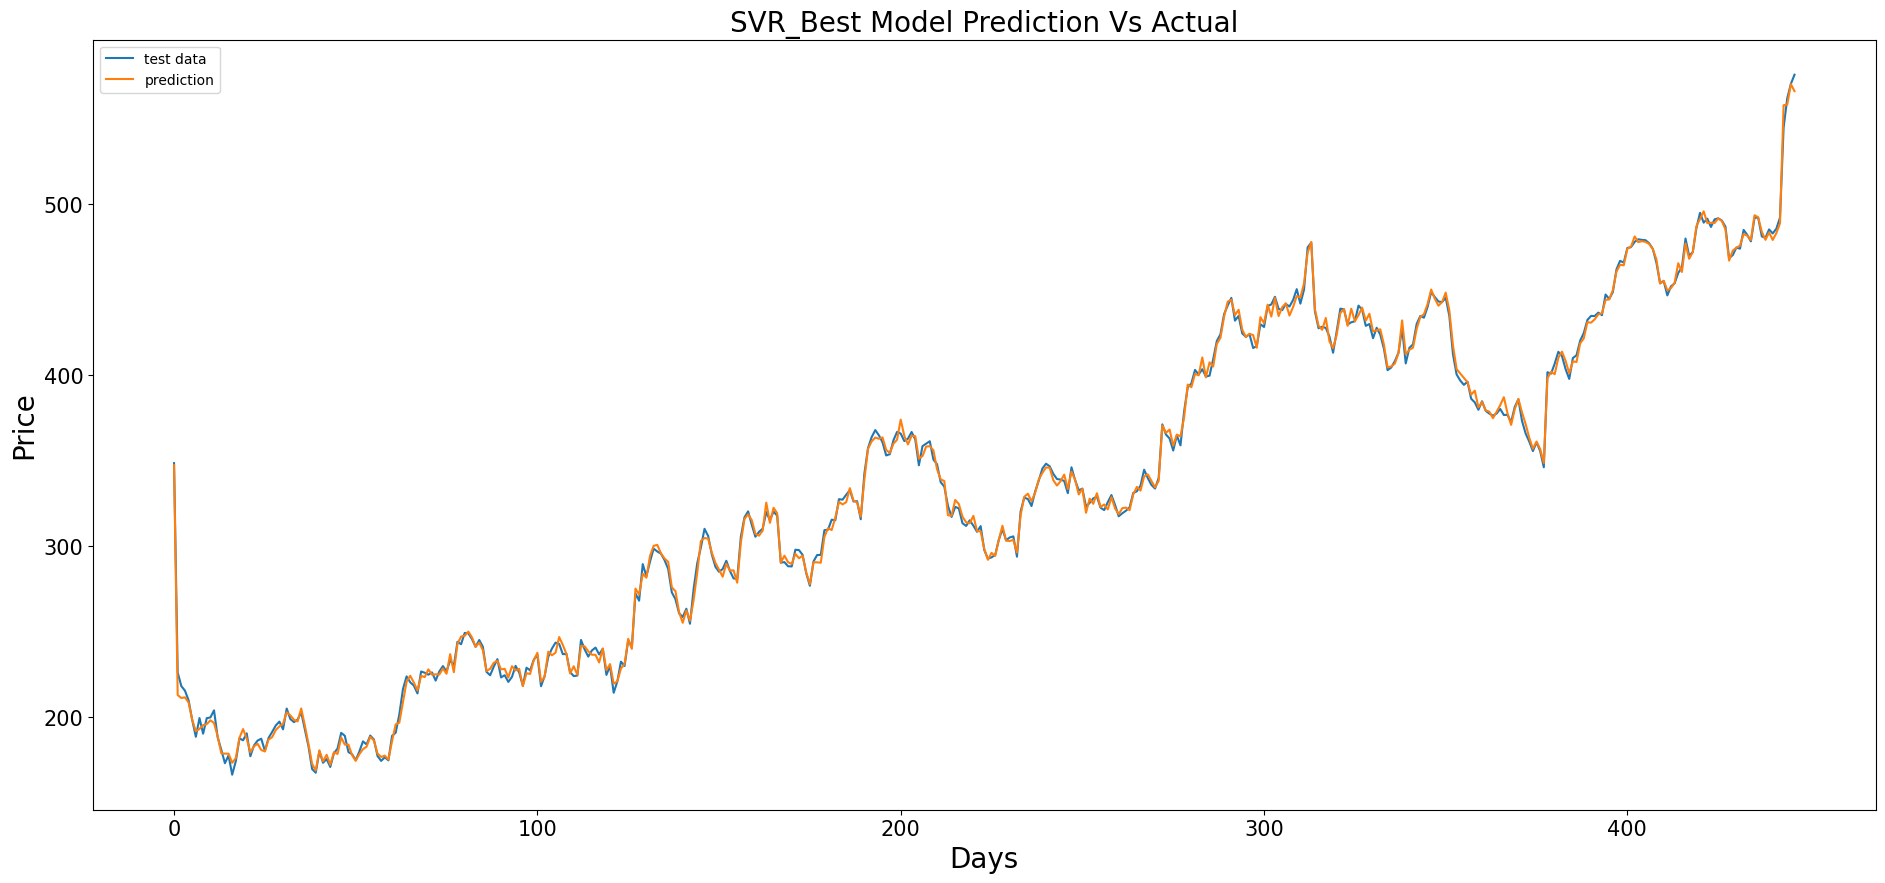

In [93]:
#SVR_Tuning model validation with test data
netflix_svr_rmse, netflix_svr_r2 = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

In [94]:
print(netflix_svr_rmse)
print(netflix_svr_r2)

3.171258447935884
0.998928695199701


In [95]:
value_Compare(model_SVRTuning)

{'C': 1000.0, 'epsilon': 0}


True_value  Predicted_value
0    348.609985       347.399732
1    226.190002       212.978545
2    218.220001       211.231010
3    215.520004       211.627779
4    209.910004       208.606698
..          ...              ...
442  492.190002       488.811567
443  544.869995       557.958452
444  562.000000       558.295598
445  570.419983       570.289475
446  575.789978       566.190665

[447 rows x 2 columns]

### **Support Vector Regressor using Tesla Stock Data**

In [96]:
tesla.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-07-27  1.394000  1.412000  1.350667  1.370000   1.370000   9295500   
2010-07-28  1.370000  1.393333  1.367333  1.381333   1.381333   7008000   
2010-07-29  1.384667  1.392000  1.333333  1.356667   1.356667   9240000   
2010-07-30  1.346667  1.362667  1.303333  1.329333   1.329333   6403500   
2010-08-02  1.366667  1.398000  1.355333  1.394667   1.394667  10771500   

            Daily returns  Days  Rolling_Mean_5  Rolling_Mean_20  \
Date                                                               
2010-07-27      -1.909331    20        1.386800         1.324767   
2010-07-28       0.827225    21        1.393467         1.314200   
2010-07-29      -1.785663    22        1.384800         1.302600   
2010-07-30      -2.014798    23        1.366800         1.295867   
2010-08-02       4.914802    24        1.366400         1.301600   

            Rolling_Std_5  Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  \
Date                                                                       
2010-07-27       0.027918        0.153098       6.934000       26.495334   
2010-07-28       0.018841        0.140401       6.967333       26.284000   
2010-07-29       0.024269        0.125303       6.924000       26.052000   
2010-07-30       0.025593        0.119665       6.834000       25.917333   
2010-08-02       0.025018        0.121596       6.832000       26.032000   

            Rolling_Min_5  Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  \
Date                                                                       
2010-07-27       1.348000       1.419333        1.053333        1.592667   
2010-07-28       1.370000       1.419333        1.053333        1.588667   
2010-07-29       1.356667       1.419333        1.053333        1.464000   
2010-07-30       1.329333       1.396667        1.053333        1.460667   
2010-08-02       1.329333       1.394667        1.053333        1.460667   

            Rolling_Var_5  Rolling_Var_20  
Date                                       
2010-07-27       0.000779        0.023439  
2010-07-28       0.000355        0.019712  
2010-07-29       0.000589        0.015701  
2010-07-30       0.000655        0.014320  
2010-08-02       0.000626        0.014786

In [97]:
# calling the normalizing function defined above is the first step
normalized_features_df = normalize_featuresDF(feature_tesla)
target_df = target_tesla

In [98]:
#Splitting validation sets from the whole dataset, the length has already been defined in the
# function as 90, which will be the data from the last 90 days in the data
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

#Now returning features and targets left after removing the validation sets

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

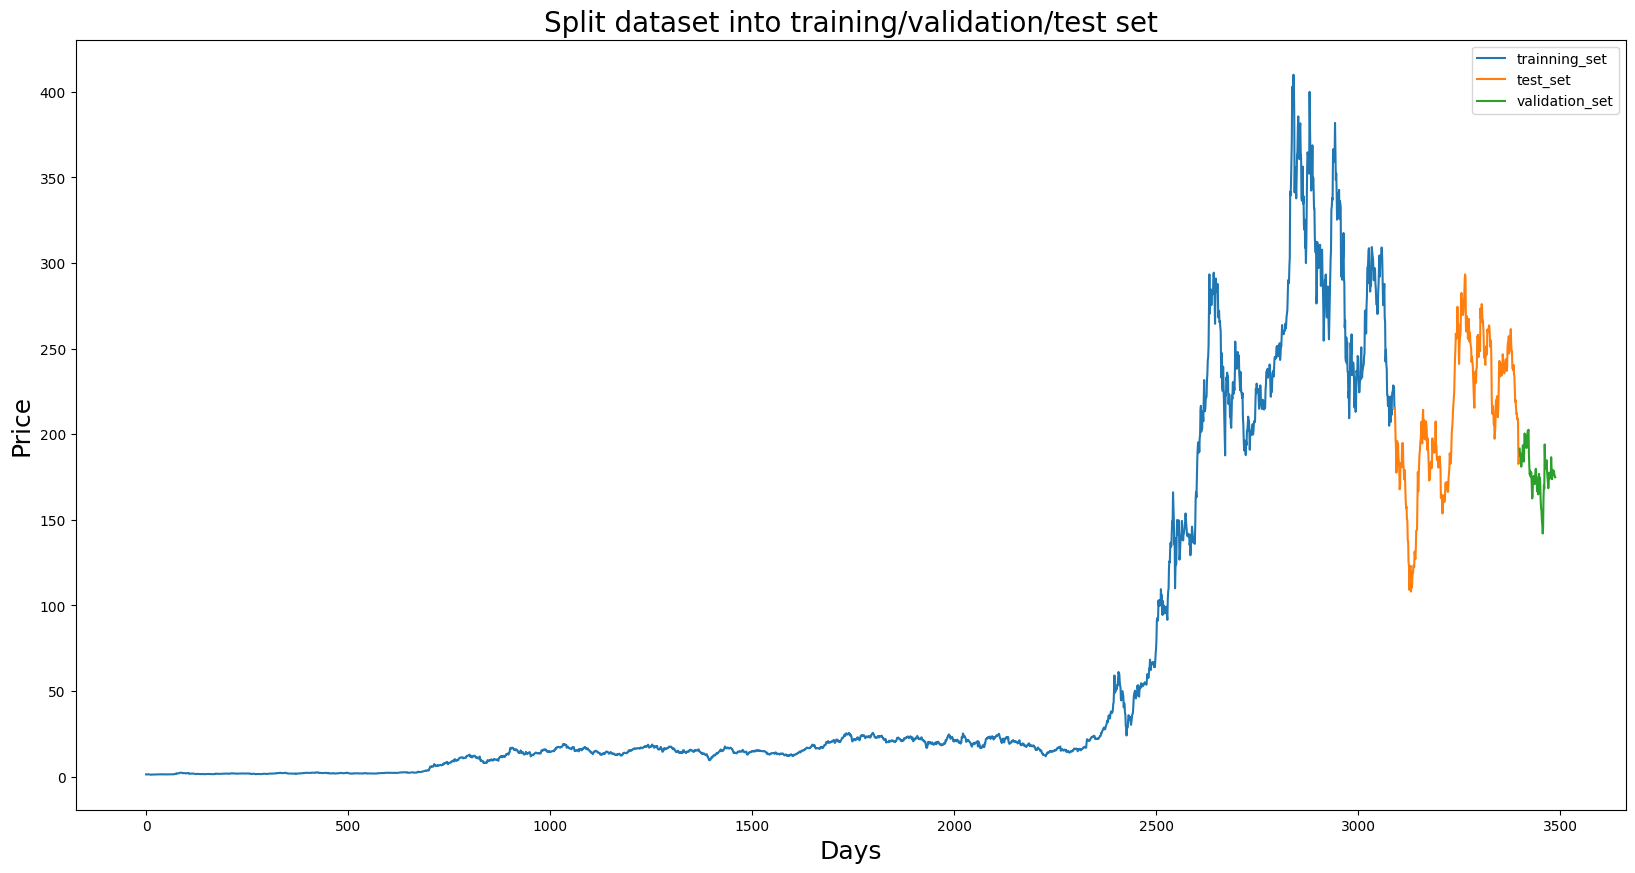

In [99]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

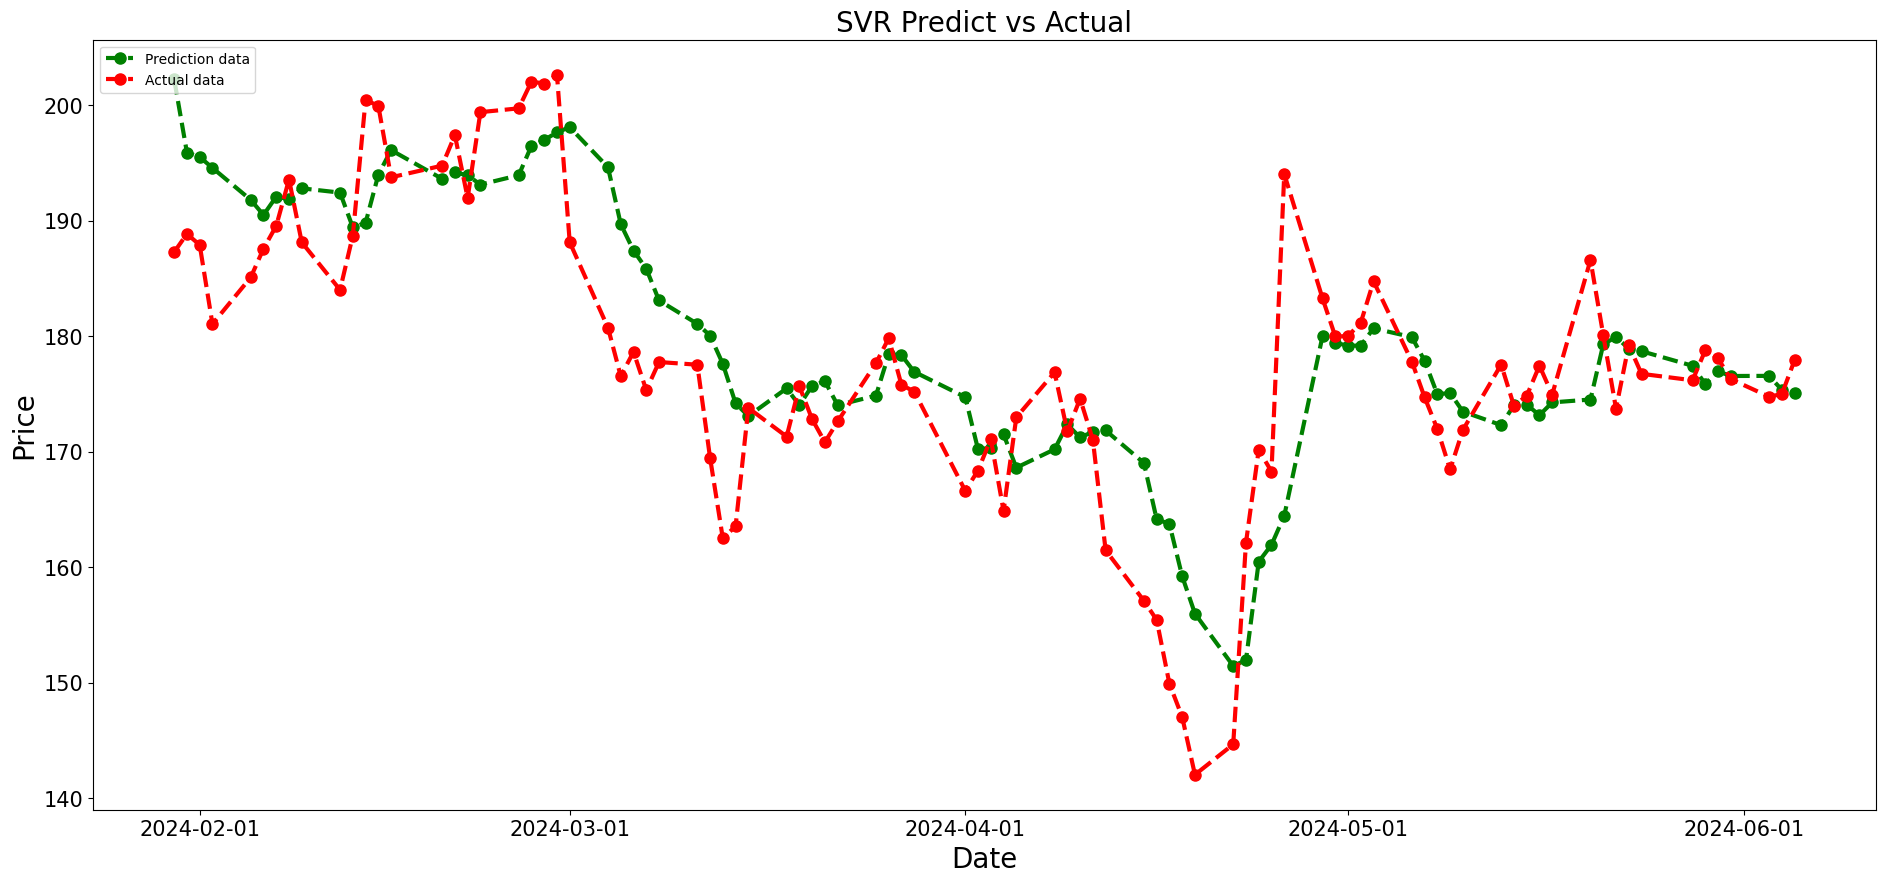

SVR RMSE:  7.332883514603896
SVR R2 score:  0.6509037270242278


In [100]:
#SVR model
# Using the validation set
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

**With hyperparameter tuning using grid search**

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model  RMSE:  2.3553874586939716
SVR_Best Model  R2 score:  0.9969030444794917


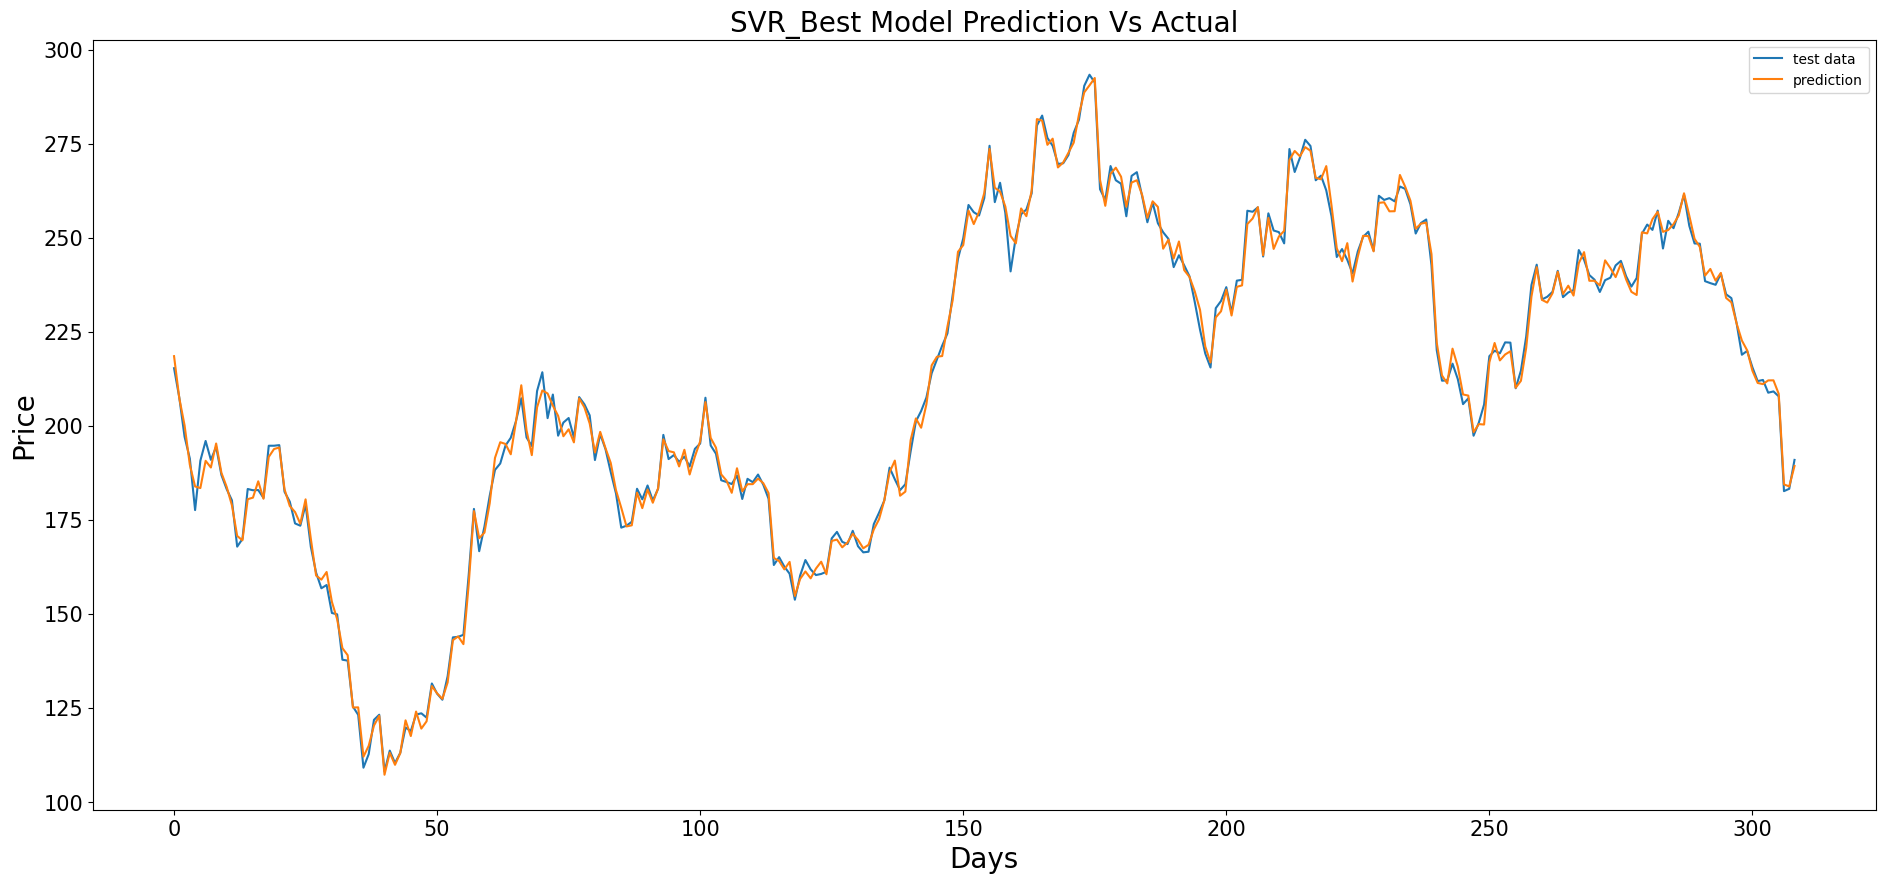

In [101]:
#SVR_Tuning model validation with test data
tesla_svr_rmse, tesla_svr_r2 = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

### **Second model: LSTM**

In [102]:
import tensorflow
import yfinance as yf
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [103]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error
import math

def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][features].values
        target_value = data[target].iloc[i + sequence_length]
        sequences.append(seq)
        targets.append(target_value)
    return np.array(sequences), np.array(targets)

def preprocess_data(df, features, target, sequence_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features + [target]])

    scaled_df = pd.DataFrame(scaled_data, columns=features + [target])

    X, y = create_sequences(scaled_df, target, sequence_length)

    return X, y, scaler, df

def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

def evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    X_train_last = X_train[:, -1, :]
    X_test_last = X_test[:, -1, :]

    train_predictions_full = np.hstack((X_train_last, train_predictions))
    test_predictions_full = np.hstack((X_test_last, test_predictions))

    train_predictions_inverse = scaler.inverse_transform(train_predictions_full)[:, -1]
    test_predictions_inverse = scaler.inverse_transform(test_predictions_full)[:, -1]

    y_train_actual = scaler.inverse_transform(np.hstack((X_train_last, y_train.reshape(-1, 1))))[:, -1]
    y_test_actual = scaler.inverse_transform(np.hstack((X_test_last, y_test.reshape(-1, 1))))[:, -1]

    train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predictions_inverse))
    test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predictions_inverse))

    test_r2 = r2_score(y_test_actual, test_predictions_inverse)

    print('Train RMSE: ', train_rmse)
    print('Test RMSE: ', test_rmse)
    print('Test r_2: ', test_r2)

    plt.figure(figsize=(23, 10))
    train_idx = df.index[sequence_length:sequence_length+len(y_train_actual)]
    test_idx = df.index[sequence_length+len(y_train_actual):sequence_length+len(y_train_actual)+len(y_test_actual)]

    plt.plot(train_idx, y_train_actual, color='red', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='red', markersize=8, label='Train Actual')
    plt.plot(train_idx, train_predictions_inverse, color='green', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='green', markersize=8, label='Train Prediction')
    plt.plot(test_idx, y_test_actual, color='blue', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='blue', markersize=8, label='Test Actual')
    plt.plot(test_idx, test_predictions_inverse, color='orange', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='orange', markersize=8, label='Test Prediction')

    plt.ylabel('Price', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('LSTM Predict vs Actual', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()

    return train_rmse, test_r2

**LSTM for Netflix Stock data**

In [104]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60



# Preprocess the data
X, y, scaler, df = preprocess_data(netflix, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [105]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
from keras.layers import Bidirectional

time_stemp = 10
model = Sequential()

model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(time_stemp, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0044
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3098e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0442e-04
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 9.3992e-05
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.9951e-05
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.1481e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.1312e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.5442e-05
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.1373e-04
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 9.1079e-05
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.8747e-05
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.0680e-05
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.5928e-05
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train RMSE:  5.329395690509792
Test RMSE:  15.134439369900578
Test r_2:  0.986690645825034


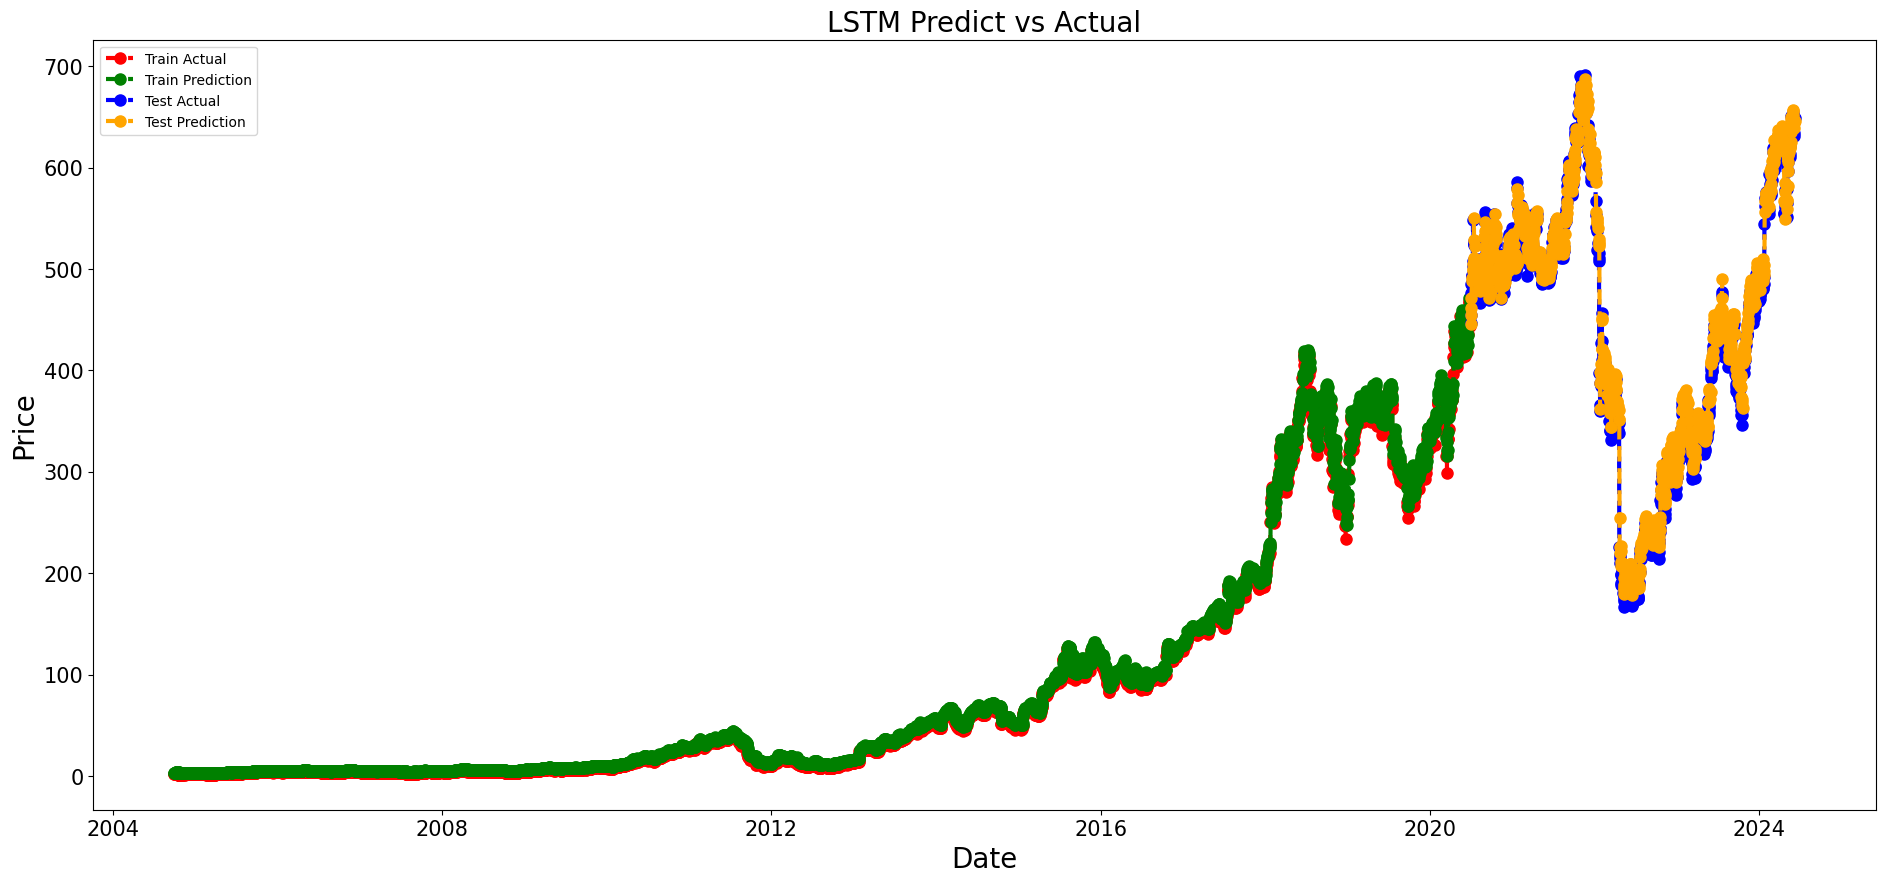

In [107]:
netflix_lstm_rmse, netflix_lstm_r2 = evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features)

**LSTM for Tesla stock data**

In [108]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60



# Preprocess the data
X, y, scaler, df = preprocess_data(tesla, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [109]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
from keras.layers import Bidirectional

time_stemp = 10
model = Sequential()

model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(time_stemp, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0126
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3118e-04
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2242e-04
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4487e-04
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3824e-04
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.4003e-04
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1126e-04
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0836e-04
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0297e-04
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1712e-04
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.1806e-05
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.2401e-05
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0997e-04
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0837e-04
Epoch 15/50
86/86 ━

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Train RMSE:  3.2814603922693095
Test RMSE:  16.57785089362397
Test r_2:  0.9277479126529362


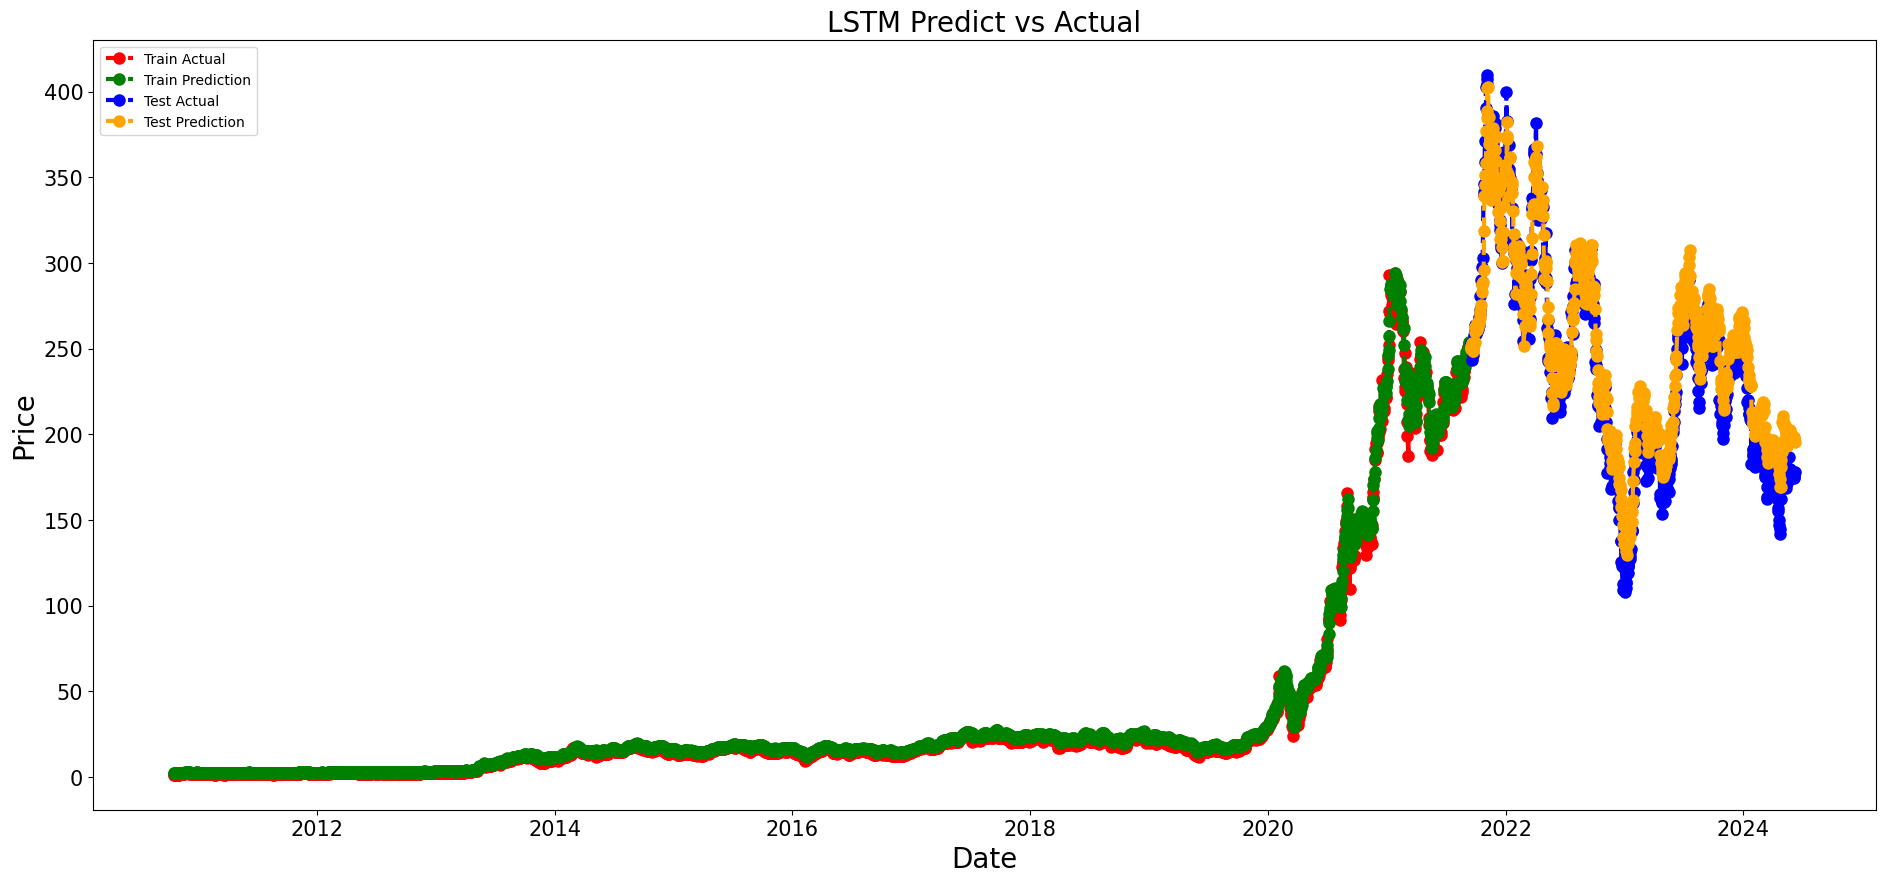

In [111]:
tesla_lstm_rmse, tesla_lstm_r2 = evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features)

In [112]:
print(tesla_lstm_r2)

0.9277479126529362


#### **Third model: LSTM - Support Vector Regressor Hybrid**

### **The hybrid for the Netflix stock data**

In [113]:
from xgboost import XGBRegressor

# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60



# Preprocess the data
X, y, scaler, df = preprocess_data(netflix, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

from keras.layers import Bidirectional

time_stemp = 10
model = Sequential()

model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(time_stemp, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0045
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.9704e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.1769e-04
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0263e-04
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.1980e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.0037e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.1324e-05
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.5439e-05
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.8763e-05
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.0511e-05
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.5609e-05
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.9614e-05
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.0141e-05
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.

In [114]:
train_features = model.predict(X_train)
test_features = model.predict(X_test)

X_train_combined = np.hstack((X_train[:, -1, :], train_features))
X_test_combined = np.hstack((X_test[:, -1, :], test_features))

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [115]:
from sklearn.svm import SVR

svr_params = {'C': [0.1, 1, 10, 100],
             'gamma': [1, 0.1, 0.01, 0.001],
             'kernel': ['rbf','linear']
            }

# Create the GridSearchCV object
svr_grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=svr_params,
    scoring = 'r2',
    cv = 4,
    n_jobs = -1,
    verbose=2
)

# Fit the model with the grid of hyperparameters
svr_grid_search.fit(X_train_combined, y_train)
# Get the best hyperparameters and model
best_params = svr_grid_search.best_params_
best_model = svr_grid_search.best_estimator_

print(f"Best SVR parameter is {best_params} and best model is {best_model}")

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best SVR parameter is {'C': 1, 'gamma': 1, 'kernel': 'linear'} and best model is SVR(C=1, gamma=1, kernel='linear')


Hybrid Model - Train RMSE:  0.0734369582823162
Hybrid Model - Test RMSE:  0.08977453647413555
Hybrid Model - Test R2:  0.7767804553404482


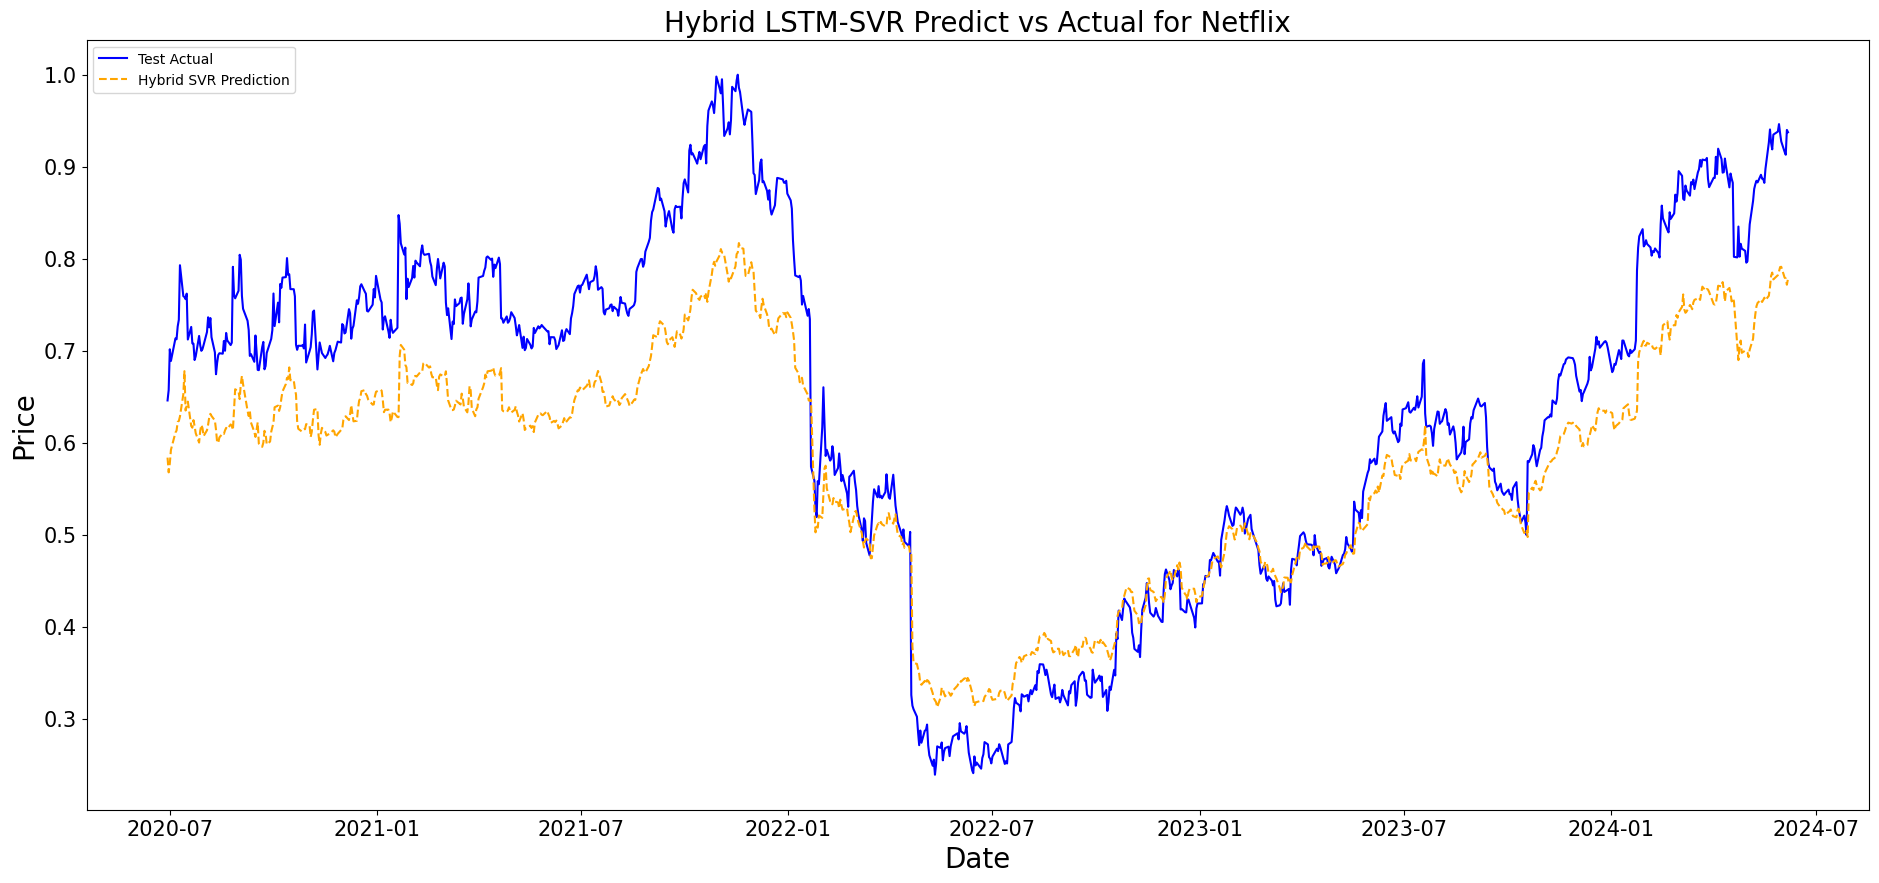

In [117]:
svr_model = SVR(C=1, gamma=1, kernel='linear')
svr_model.fit(X_train_combined, y_train)

# Making predictions using the SVR model
train_predictions_svr = svr_model.predict(X_train_combined)
test_predictions_svr = svr_model.predict(X_test_combined)

# Evaluate the Hybrid Model
train_rmse_svr = math.sqrt(mean_squared_error(y_train, train_predictions_svr))
test_rmse_svr = math.sqrt(mean_squared_error(y_test, test_predictions_svr))
test_r2_svr = r2_score(y_test, test_predictions_svr)

print('Hybrid Model - Train RMSE: ', train_rmse_svr)
print('Hybrid Model - Test RMSE: ', test_rmse_svr)
print('Hybrid Model - Test R2: ', test_r2_svr)

# Compare LSTM and Hybrid Model predictions
plt.figure(figsize=(23, 10))
train_idx = df.index[sequence_length:sequence_length + len(y_train)]
test_idx = df.index[sequence_length + len(y_train):sequence_length + len(y_train) + len(y_test)]

plt.plot(test_idx, y_test, color='blue', label='Test Actual')
plt.plot(test_idx, test_predictions_svr, color='orange', linestyle='dashed', label='Hybrid SVR Prediction')

plt.ylabel('Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Hybrid LSTM-SVR Predict vs Actual for Netflix', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [118]:
netflix_hyb_rmse = test_rmse_svr
netflix_hyb_r2 = test_r2_svr

In [119]:
print(netflix_hyb_rmse)
print(netflix_hyb_r2)

0.08977453647413555
0.7767804553404482


### **The hybrid for the Tesla stock data**

In [120]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60



# Preprocess the data
X, y, scaler, df = preprocess_data(tesla, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

time_stemp = 10
model = Sequential()

model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(time_stemp, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0085
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.9733e-04
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3098e-04
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2198e-04
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5082e-04
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0478e-04
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1972e-04
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0428e-04
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1736e-04
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.5392e-05
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2195e-05
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.2497e-05
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.6611e-05
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6875e-05
Epoch 15/50
86/86 ━

In [121]:
train_features = model.predict(X_train)
test_features = model.predict(X_test)

X_train_combined = np.hstack((X_train[:, -1, :], train_features))
X_test_combined = np.hstack((X_test[:, -1, :], test_features))

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [122]:
from sklearn.svm import SVR

svr_params = {'C': [0.1, 1, 10, 100],
             'gamma': [1, 0.1, 0.01, 0.001],
             'kernel': ['rbf','linear']
            }

# Create the GridSearchCV object
svr_grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=svr_params,
    scoring = 'r2',
    cv = 4,
    n_jobs = -1,
    verbose=2
)

# Fit the model with the grid of hyperparameters
svr_grid_search.fit(X_train_combined, y_train)
# Get the best hyperparameters and model
best_params = svr_grid_search.best_params_
best_model = svr_grid_search.best_estimator_

print(f"Best SVR parameter is {best_params} and best model is {best_model}")

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best SVR parameter is {'C': 1, 'gamma': 1, 'kernel': 'linear'} and best model is SVR(C=1, gamma=1, kernel='linear')


Hybrid Model - Train RMSE:  0.08473912863335228
Hybrid Model - Test RMSE:  0.04301879838054372
Hybrid Model - Test R2:  0.9186935151177371


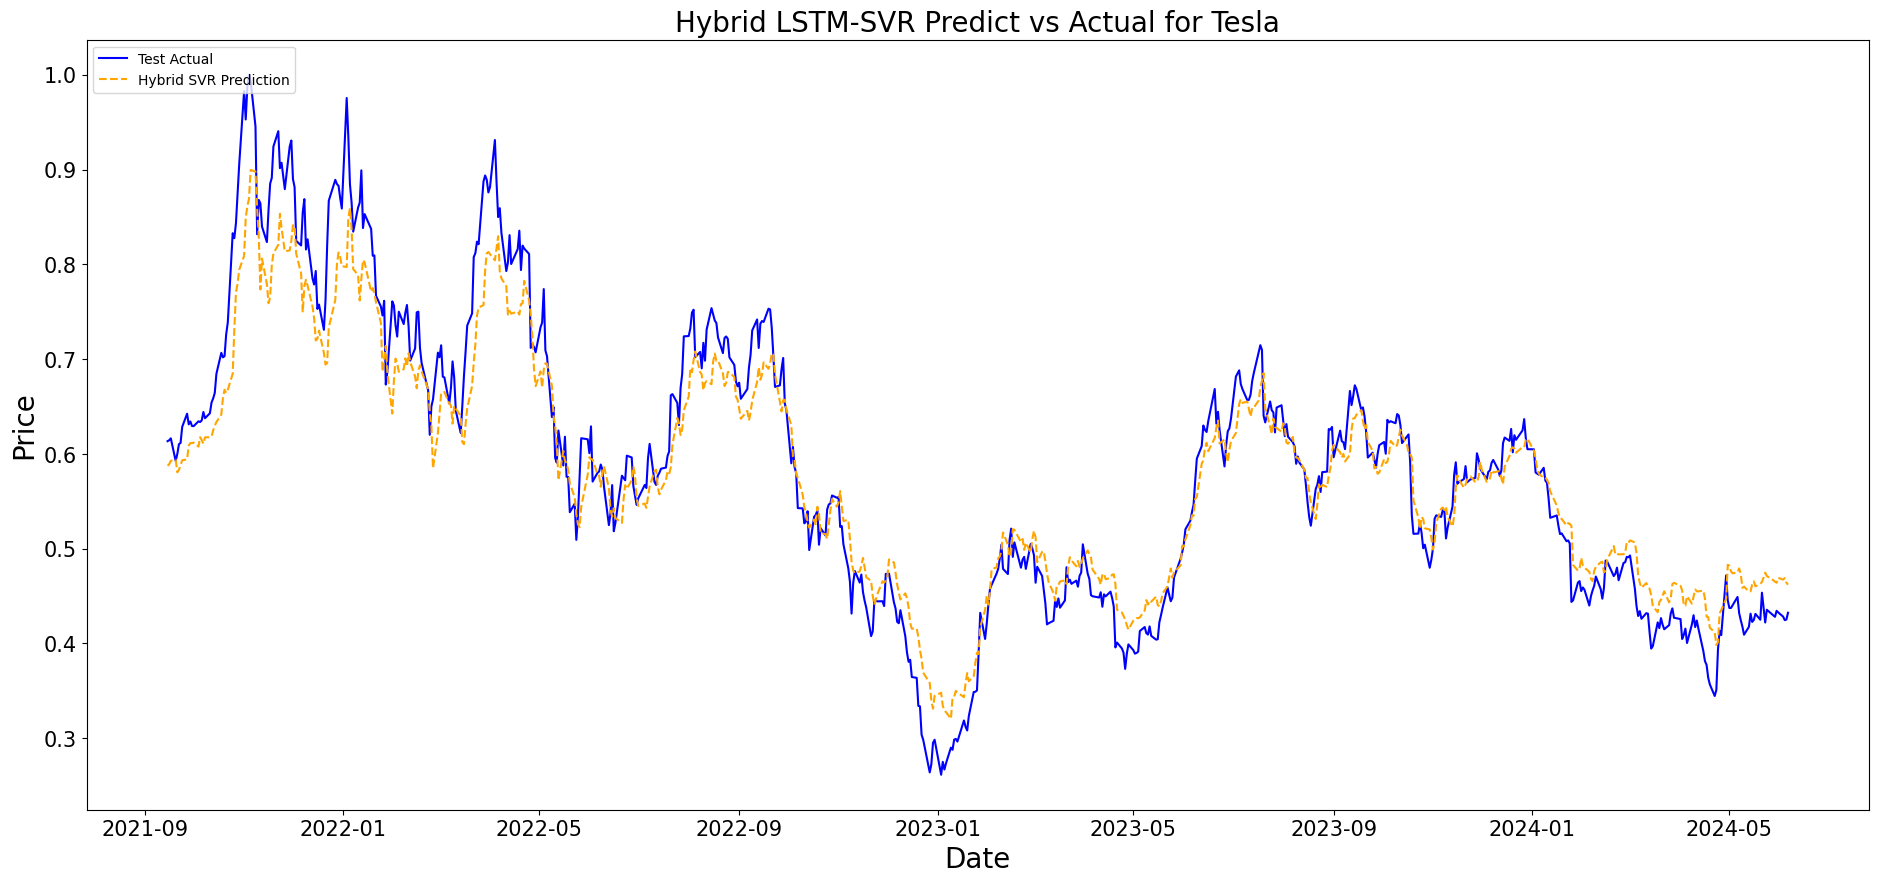

In [123]:
svr_model = SVR(C=1, gamma=1, kernel='linear')
svr_model.fit(X_train_combined, y_train)

# Make Predictions using the SVR Model
train_predictions_svr = svr_model.predict(X_train_combined)
test_predictions_svr = svr_model.predict(X_test_combined)

# Evaluate the Hybrid Model
train_rmse_svr = math.sqrt(mean_squared_error(y_train, train_predictions_svr))
test_rmse_svr = math.sqrt(mean_squared_error(y_test, test_predictions_svr))
test_r2_svr = r2_score(y_test, test_predictions_svr)

print('Hybrid Model - Train RMSE: ', train_rmse_svr)
print('Hybrid Model - Test RMSE: ', test_rmse_svr)
print('Hybrid Model - Test R2: ', test_r2_svr)

# Compare LSTM and Hybrid Model predictions
plt.figure(figsize=(23, 10))
train_idx = df.index[sequence_length:sequence_length + len(y_train)]
test_idx = df.index[sequence_length + len(y_train):sequence_length + len(y_train) + len(y_test)]

plt.plot(test_idx, y_test, color='blue', label='Test Actual')
plt.plot(test_idx, test_predictions_svr, color='orange', linestyle='dashed', label='Hybrid SVR Prediction')

plt.ylabel('Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Hybrid LSTM-SVR Predict vs Actual for Tesla', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [124]:
tesla_hyb_rmse = test_rmse_svr
tesla_hyb_r2 = test_r2_svr

### **Comparison of model performances**

In [125]:
# metrics for Netflix
netflix_data = {
    'Model': ['SVR', 'LSTM', 'LSTM-SVR Hybrid'],
    'RMSE': [netflix_svr_rmse, netflix_lstm_rmse, netflix_hyb_rmse],
    'R2': [netflix_svr_r2, netflix_lstm_r2, netflix_hyb_r2]
}

# metrics for Tesla
tesla_data = {
    'Model': ['SVR', 'LSTM', 'LSTM-SVR Hybrid'],
    'RMSE': [tesla_svr_rmse, tesla_lstm_rmse, tesla_hyb_rmse],
    'R2': [tesla_svr_r2, tesla_lstm_r2, tesla_hyb_r2]
}

# Create dataframes
df_netflix = pd.DataFrame(netflix_data)
df_tesla = pd.DataFrame(tesla_data)


df_combined = pd.concat([df_netflix.assign(Stock='Netflix'), df_tesla.assign(Stock='Tesla')])


print(df_combined)

             Model      RMSE        R2    Stock
0              SVR  3.171258  0.998929  Netflix
1             LSTM  5.329396  0.986691  Netflix
2  LSTM-SVR Hybrid  0.089775  0.776780  Netflix
0              SVR  2.355387  0.996903    Tesla
1             LSTM  3.281460  0.927748    Tesla
2  LSTM-SVR Hybrid  0.043019  0.918694    Tesla


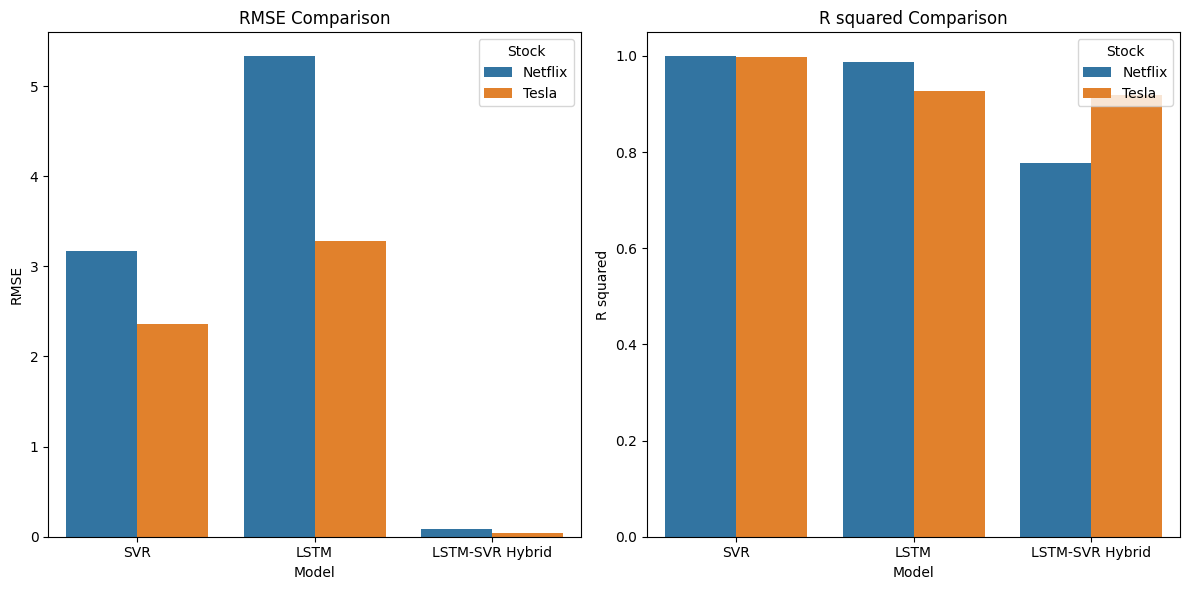

In [126]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6)) # Create axis and figure

# Plot RMSE values
sns.barplot(x='Model', y='RMSE', hue='Stock', data=df_combined, ax=axis[0])
axis[0].set_title('RMSE Comparison')
axis[0].set_ylabel('RMSE')
axis[0].set_xlabel('Model')

# Plot R^2 values
sns.barplot(x='Model', y='R2', hue='Stock', data=df_combined, ax=axis[1])
axis[1].set_title('R squared Comparison')
axis[1].set_ylabel('R squared')
axis[1].set_xlabel('Model')

plt.tight_layout()

# Show the plot
plt.show()

The LSTM-SVR hybrid had the lowest RMSE value for the netflix and tesla stocks, while the SVR model had the highest R2 value